# CENSUS INCOME ANALYSIS

**Prediction task:** Determine whether a person makes over $50K a year.

**UCI Machine Learning Repository:** https://archive.ics.uci.edu/ml/datasets/Census+Income

## 1. IMPORT DATASET

In [1]:
''' 
The list of packages used for data analysis & modeling
'''

#base libraries
import pylab
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

#modeling libraries
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

#initial settings
sns.set_context("poster")
sns.set_style("whitegrid")
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

C:\Users\RR5033675\AppData\Local\Continuum\Anaconda2_4.3.1\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\RR5033675\AppData\Local\Continuum\Anaconda2_4.3.1\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
'''
Settings to import data
'''

#column names
FEATURES = ["age", "workclass", "fnlwgt", "education", "education_num",
            "martial_status", "occupation", "relationship", "race", 
            "sex", "capital_gain", "capital_loss", "hours_per_week",
            "native_country", "salary"]

#na values
NA_VALUES = ['?', '']

In [3]:
'''
Import data and view the first few rows
'''

#import income data as Pandas data-frame
census_data = pd.read_csv("./Data/adult.data", 
                          sep = ",\s",
                          names = FEATURES,
                          na_values = NA_VALUES,
                          engine = 'python')
                          
print "Dimensions of the dataset (features, samples): " , census_data.shape
print

head = int(raw_input("To display first N rows, enter N: "))
census_data.head(head)

Dimensions of the dataset (features, samples):  (32561, 15)

To display first N rows, enter N: 6


,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
'''
Distribution of dependent variable (salary)
'''

#distribution
print "Distribution of dependent variable: "
print census_data.salary.value_counts(), '\n'

#percentage distribution
print "%Distribution of dependent variable: "
print census_data.salary.value_counts()/sum(census_data.salary.value_counts()) * 100

Distribution of dependent variable: 
<=50K    24720
>50K      7841
Name: salary, dtype: int64 

%Distribution of dependent variable: 
<=50K    75.919044
>50K     24.080956
Name: salary, dtype: float64


In [5]:
'''
Checking the data types to make sure they are correctly encoded
'''

census_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
martial_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary            object
dtype: object

## 2. PREPROCESSING MISSING VALUES

### A. DETECT NA VALUES

In [6]:
'''
Check for NA values for all the features
'''

census_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
martial_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
salary               0
dtype: int64

Observation:
* NA values are present for **3 categorical features**. We can check the event-rate/distribution of the NA values w.r.t to the dependent variable and decide the optimal preprocessing step for dealing with them.

### A1. WORKCLASS

In [7]:
'''
Checking the event-rate/distribution of NA for the workclass feature w.r.t. salary
'''

print "Distribution of NA values for workclass w.r.t salary: "
print pd.crosstab(census_data.salary, 
                  census_data.workclass.isnull(),
                  margins = True)
print

print "%Distribution of NA values for workclass w.r.t. salary category: "
print pd.crosstab(census_data.salary, 
                  census_data.workclass.isnull()).apply(lambda r: r/r.sum() * 100, axis=1).round(3)
print 

print "%Distribution of NA values for workclass w.r.t. salary: "
print (pd.crosstab(census_data.salary, 
                   census_data.workclass.isnull(),
                   margins = True)/sum(census_data.salary.value_counts()) * 100).round(3)

Distribution of NA values for workclass w.r.t salary: 
workclass  False  True    All
salary                       
<=50K      23075  1645  24720
>50K        7650   191   7841
All        30725  1836  32561

%Distribution of NA values for workclass w.r.t. salary category: 
workclass   False  True 
salary                  
<=50K      93.345  6.655
>50K       97.564  2.436

%Distribution of NA values for workclass w.r.t. salary: 
workclass   False   True      All
salary                           
<=50K      70.867  5.052   75.919
>50K       23.494  0.587   24.081
All        94.361  5.639  100.000


Observations:
* Total NA values for the workclass feature = 1645+191 = **1836** 
* Percentage of NA values = 1836/32561 = **5.64%**
* Percentage of NA values for <=50K = 1645/24720 = **6.655%**
* Percentage of NA values for >50K = 191/7841 = **2.436%**

Now, lets check the distribution of each of the categories of the workclass feature.

In [8]:
'''
Event rate of workclass w.r.t salary (%)
'''

print "%Distribution of workclass w.r.t salary: "
pd.crosstab(census_data.salary, census_data.workclass).apply(lambda r: r/r.sum() * 100, axis=1)

%Distribution of workclass w.r.t salary: 


workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
salary,,,,,,,,
<=50K,2.552546,6.396533,0.030336,76.849404,2.140845,7.874323,4.095341,0.060672
>50K,4.849673,8.065359,0.000000,64.875817,8.130719,9.464052,4.614379,0.000000


Observation:
* Since the **Private** category of the workclass feature has the highest distribution w.r.t the dependent variable categories, we can impute **NA** to this category.

### A2. OCCUPATION

In [9]:
'''
Checking the event-rate/distribution of NA for the occupation feature w.r.t. salary
'''

print "Distribution of NA values for occupation w.r.t salary: "
print pd.crosstab(census_data.salary, 
                  census_data.occupation.isnull(), 
                  margins = True)
print

print "%Distribution of NA values for occupation w.r.t. salary category: "
print pd.crosstab(census_data.salary, 
                  census_data.occupation.isnull())\
        .apply(lambda r: r/r.sum() * 100, axis=1)\
        .round(3)
print 

print "%Distribution of NA values for occupation w.r.t. salary: "
print (pd.crosstab(census_data.salary, 
                   census_data.occupation.isnull(),
                   margins = True)/sum(census_data.salary.value_counts()) * 100).round(3)

Distribution of NA values for occupation w.r.t salary: 
occupation  False  True    All
salary                        
<=50K       23068  1652  24720
>50K         7650   191   7841
All         30718  1843  32561

%Distribution of NA values for occupation w.r.t. salary category: 
occupation   False  True 
salary                   
<=50K       93.317  6.683
>50K        97.564  2.436

%Distribution of NA values for occupation w.r.t. salary: 
occupation   False   True      All
salary                            
<=50K       70.845  5.074   75.919
>50K        23.494  0.587   24.081
All         94.340  5.660  100.000


Observations:
* Total NA values for the occupation feature = 1652+191 = **1843** 
* Percentage of NA values = 1843/32561 = **5.66%**
* Percentage of NA values for <=50K = 1652/24720 = **6.683%**
* Percentage of NA values for >50K = 191/7841 = **2.436%**

Now, lets check the distribution of each of the categories of the occupation feature.

In [10]:
'''
Event rate of occupation w.r.t salary (%)
'''

print "%Distribution of occupation w.r.t salary: "
pd.crosstab(census_data.salary, census_data.occupation)\
  .apply(lambda r: r/r.sum() * 100, axis=1)

%Distribution of occupation w.r.t salary: 


occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
salary,,,,,,,,,,,,,,
<=50K,14.145136,0.034680,13.741980,9.09485,3.810473,5.566152,7.594937,13.68996,0.641581,9.888157,1.898734,11.561470,2.796081,5.535807
>50K,6.627451,0.013072,12.143791,25.72549,1.503268,1.124183,3.267974,1.79085,0.013072,24.300654,2.758170,12.849673,3.699346,4.183007


In [11]:
census_data.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Observation: 
* Since none the categories of the occupation feature have a skewed distribution as such, we can **drop** **NA** for this feature.

### A3. NATIVE_COUNTRY

In [12]:
'''
Checking the event-rate/distribution of NA for the native_country feature w.r.t. salary
'''

print "Distribution of NA values for native_country w.r.t salary: "
print pd.crosstab(census_data.salary, 
                  census_data.native_country.isnull(), 
                  margins = True)
print

print "% distribution of NA values for native_country w.r.t. salary category: "
print pd.crosstab(census_data.salary, 
                  census_data.native_country.isnull())\
        .apply(lambda r: r/r.sum() * 100, axis=1)\
        .round(3)
print 

print "% distribution of NA values for native_country w.r.t. salary: "
print (pd.crosstab(census_data.salary, 
                   census_data.native_country.isnull(),
                   margins = True)/sum(census_data.salary.value_counts()) * 100).round(3)

Distribution of NA values for native_country w.r.t salary: 
native_country  False  True    All
salary                            
<=50K           24283   437  24720
>50K             7695   146   7841
All             31978   583  32561

% distribution of NA values for native_country w.r.t. salary category: 
native_country   False  True 
salary                       
<=50K           98.232  1.768
>50K            98.138  1.862

% distribution of NA values for native_country w.r.t. salary: 
native_country   False   True      All
salary                                
<=50K           74.577  1.342   75.919
>50K            23.633  0.448   24.081
All             98.210  1.790  100.000


Observations:
* Total NA values for the native_country feature = 437+146 = **583** 
* Percentage of NA values = 583/32561 = **1.8%**
* Percentage of NA values for <=50K = 437/24720 = **1.77%**
* Percentage of NA values for >50K = 146/7841 = **1.86%**

Now, lets check the distribution of each of the categories of the native_country feature

In [13]:
'''
Event rate of native_country w.r.t salary (%)
'''

print "%Distribution of native_country w.r.t salary: "
pd.crosstab(census_data.salary, census_data.native_country).apply(lambda r: r/r.sum() * 100, axis=1)

%Distribution of native_country w.r.t salary: 


native_country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,0.049417,0.337685,0.226496,0.234732,0.288268,0.280031,0.098835,0.399456,0.247086,0.070008,0.382984,0.086480,0.251205,0.164724,0.004118,0.049417,0.057654,0.041181,0.247086,0.102953,0.078244,0.197669,0.292386,0.156488,0.065890,2.512045,0.131779,0.057654,0.119425,0.564181,0.197669,0.135898,0.420047,0.037063,0.263559,0.127661,0.061772,0.070008,90.594243,0.255323,0.041181
>50K,0.090968,0.506823,0.259909,0.025991,0.324886,0.025991,0.051982,0.116959,0.389864,0.155945,0.571800,0.103964,0.038986,0.051982,0.000000,0.012995,0.077973,0.038986,0.519818,0.233918,0.064977,0.324886,0.129955,0.311891,0.025991,0.428850,0.025991,0.000000,0.025991,0.792723,0.155945,0.051982,0.155945,0.038986,0.207927,0.259909,0.038986,0.025991,93.190383,0.064977,0.077973


Observation:
* Since **United-States** of the native_country feature has the highest distribution w.r.t the dependent variable categories, we can impute **NA** to this category. 

### B. IMPUTATION

Observations:
* Total NA values for all features = 1836+1843+583 = **4262**
* Percentage of NA values for the entire dataset = 4262/32561 = **13.08%**
* Percentage of NA values for <=50K = (1645+1652+437)/24720 = **15.1%**
* Percentage of NA values for >50K = (191+191+146)/7841 = **6.73%**

In [14]:
'''
Imputing NA features appropriately
'''

census_data['workclass'].fillna('Private', inplace = True)
census_data['native_country'].fillna('United-States', inplace = True)
census_data = census_data.dropna(how = 'any')
census_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [15]:
'''
Fix row indexes
'''

census_data = census_data.reset_index(drop=True)

## 3. EXPLORATORY DATA ANALYSIS

In [16]:
'''
Encode salary variable as binary, <=50k -> 0 and >50k -> 1
'''

census_data.salary = census_data.salary.astype('category').cat.codes
census_data.salary.value_counts()

0    23068
1     7650
Name: salary, dtype: int64

### A. NUMERIC FEATURES

In [17]:
'''
Displaying summary statisitcs of all the numeric features
'''

census_data.describe().round(2)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,salary
count,30718.00,30718.00,30718.00,30718.00,30718.00,30718.00,30718.00
mean,38.44,189845.55,10.13,1106.04,88.91,40.95,0.25
std,13.12,105458.31,2.56,7497.86,405.66,11.99,0.43
min,17.00,13769.00,1.00,0.00,0.00,1.00,0.00
25%,28.00,117828.50,9.00,0.00,0.00,40.00,0.00
50%,37.00,178517.00,10.00,0.00,0.00,40.00,0.00
75%,47.00,237317.00,13.00,0.00,0.00,45.00,0.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00,1.00


Populating the interactive namespace from numpy and matplotlib


C:\Users\RR5033675\AppData\Local\Continuum\Anaconda2_4.3.1\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


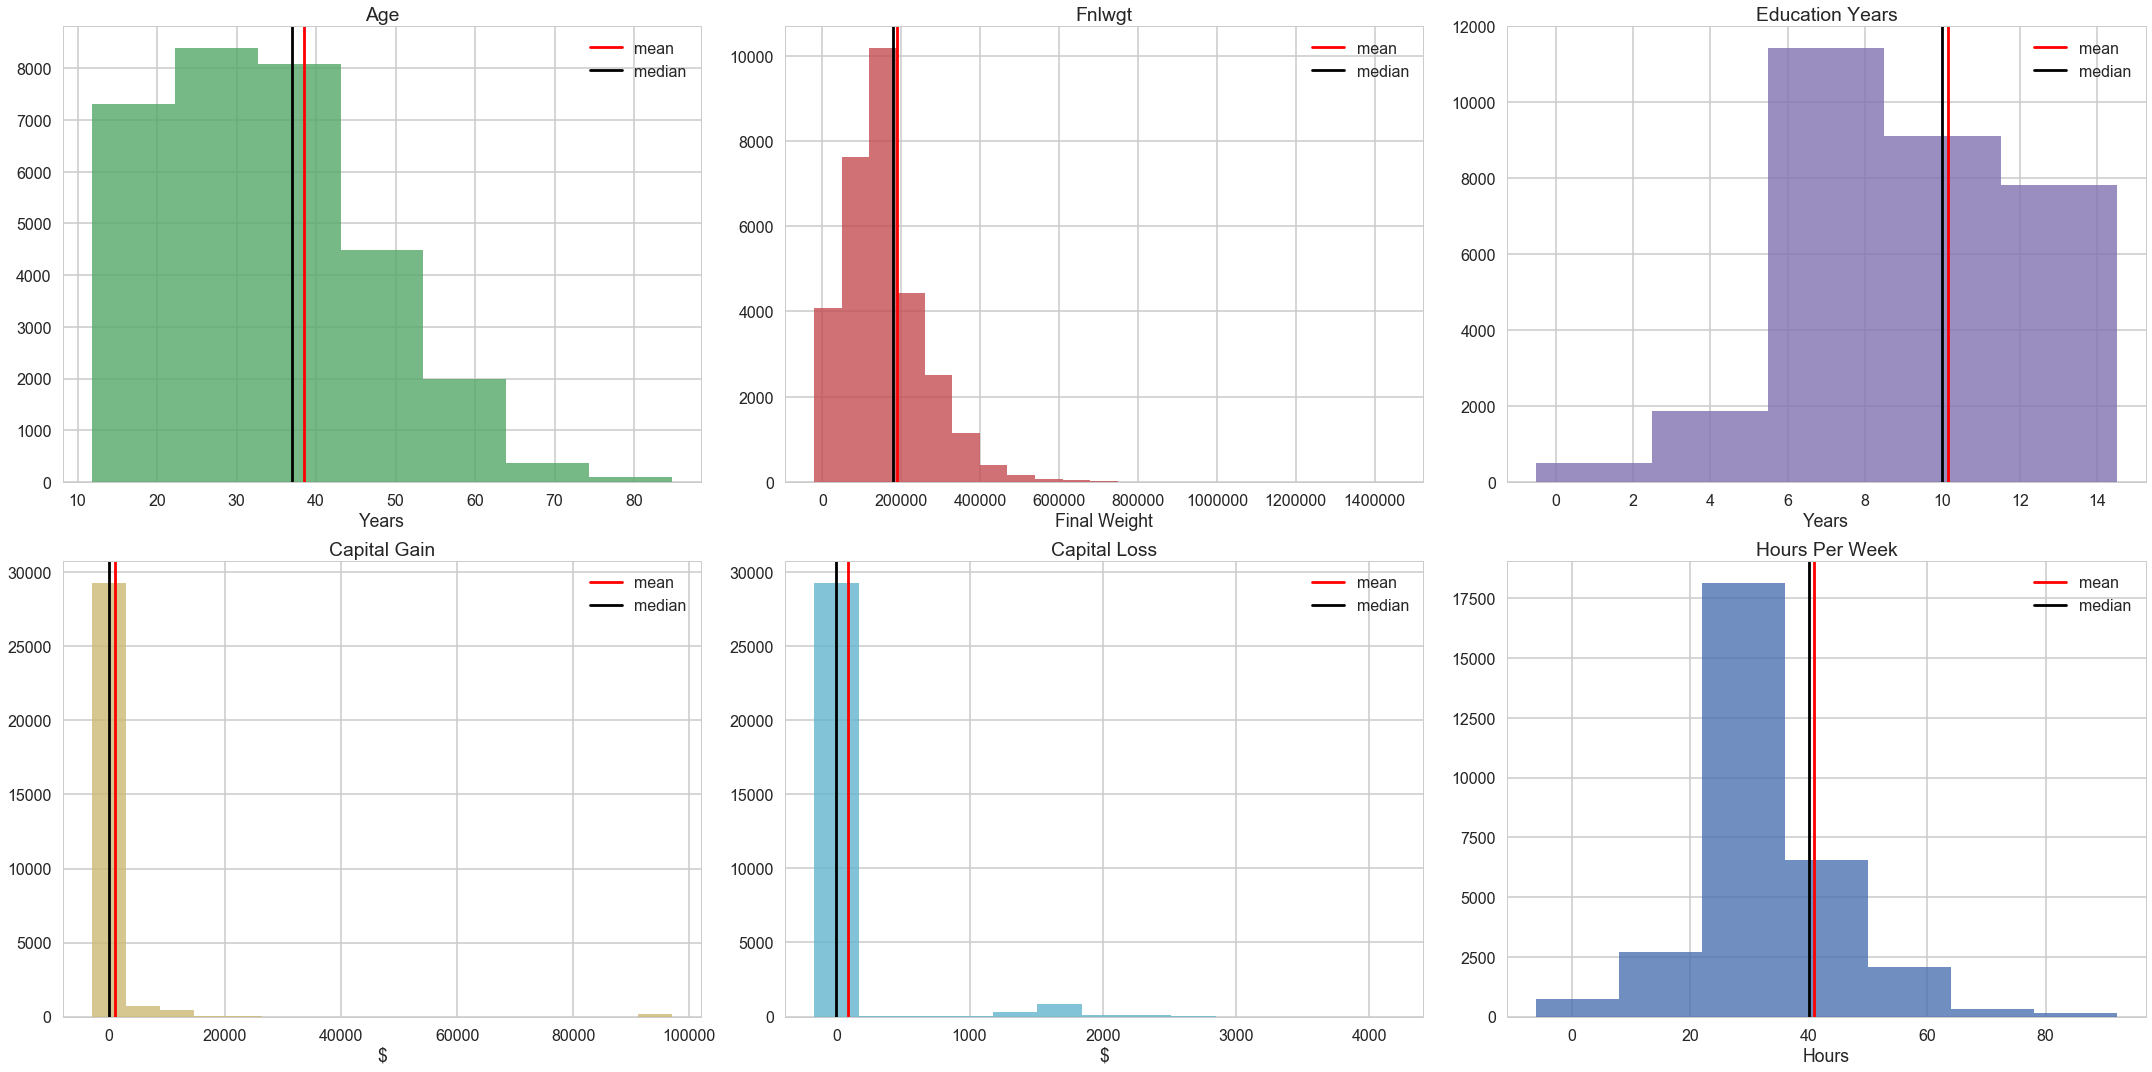

In [18]:
'''
Histogram is a graphical representation of the numerical data. 
The classes/bins for the below histograms are selected using the “2 to the k rule”, 
where k is the number of classes/bins. The smallest number k such that 2^k is 
greater than the number of observations is selected. 

Example – For 180 observations, 8 would be the ideal numbers of bins as 2^8 = 256 
(the smallest 2^k number greater than the number of observations; 2^7 = 128).
''' 

%pylab inline
plt.figure(figsize = (30, 15))
colors = sns.color_palette()

plt.subplot(2, 3, 1)
plt.hist(census_data['age'], bins = 7, color = colors[1], align = 'left', alpha = 0.8)
plt.axvline(census_data['age'].mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(census_data['age'].median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')
plt.title('Age')
plt.xlabel('Years')

plt.subplot(2, 3, 2)
plt.hist(census_data['fnlwgt'], bins = 21, color = colors[2], align = 'left', alpha = 0.8)
plt.axvline(census_data['fnlwgt'].mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(census_data['fnlwgt'].median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')
plt.xlabel(['2k', '3'])
plt.title('Fnlwgt')
plt.xlabel('Final Weight')

plt.subplot(2, 3, 3)
plt.hist(census_data['education_num'], bins = 5, color = colors[3], align = 'left', alpha = 0.8)
plt.axvline(census_data['education_num'].mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(census_data['education_num'].median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')
plt.title('Education Years')
plt.xlabel('Years')

plt.subplot(2, 3, 4)
plt.hist(census_data['capital_gain'], bins = 17, color = colors[4], align = 'left', alpha = 0.8)
plt.axvline(census_data['capital_gain'].mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(census_data['capital_gain'].median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')
plt.title('Capital Gain')
plt.xlabel('$')

plt.subplot(2, 3, 5)
plt.hist(census_data['capital_loss'], bins = 13, color = colors[5], align = 'left', alpha = 0.8)
plt.axvline(census_data['capital_loss'].mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(census_data['capital_loss'].median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')
plt.title('Capital Loss')
plt.xlabel('$')

plt.subplot(2, 3, 6)
plt.hist(census_data['hours_per_week'], bins = 7, align = 'left', alpha = 0.8)
plt.axvline(census_data['hours_per_week'].mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(census_data['hours_per_week'].median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')
plt.title('Hours Per Week')
plt.xlabel('Hours')

plt.tight_layout()
pylab.show()

Observations:
* All features, except **education_years** and **hours_per_week**, are right skewed.
* **capital_gain** and **capital_loss** have most of the values as 0. In this case, we can create bins for these features and check the respective distributions again. This is done to make sure that we can safely drop these feature for modeling because they have extremely **narrow distributions**.

When data is **skewed**, the extreme values in the **long tail can have a disproportionately large influence** on whatever test is performed or models built. **Reducing skew may improve results**. Taking the **square root of each data point** or taking the **natural logarithm of each data point** are two simple transformations that can **reduce right-skeweness**. Furthermore, taking the **square, cube or exponential transformations** can **reduce left skewness**.

Populating the interactive namespace from numpy and matplotlib


C:\Users\RR5033675\AppData\Local\Continuum\Anaconda2_4.3.1\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


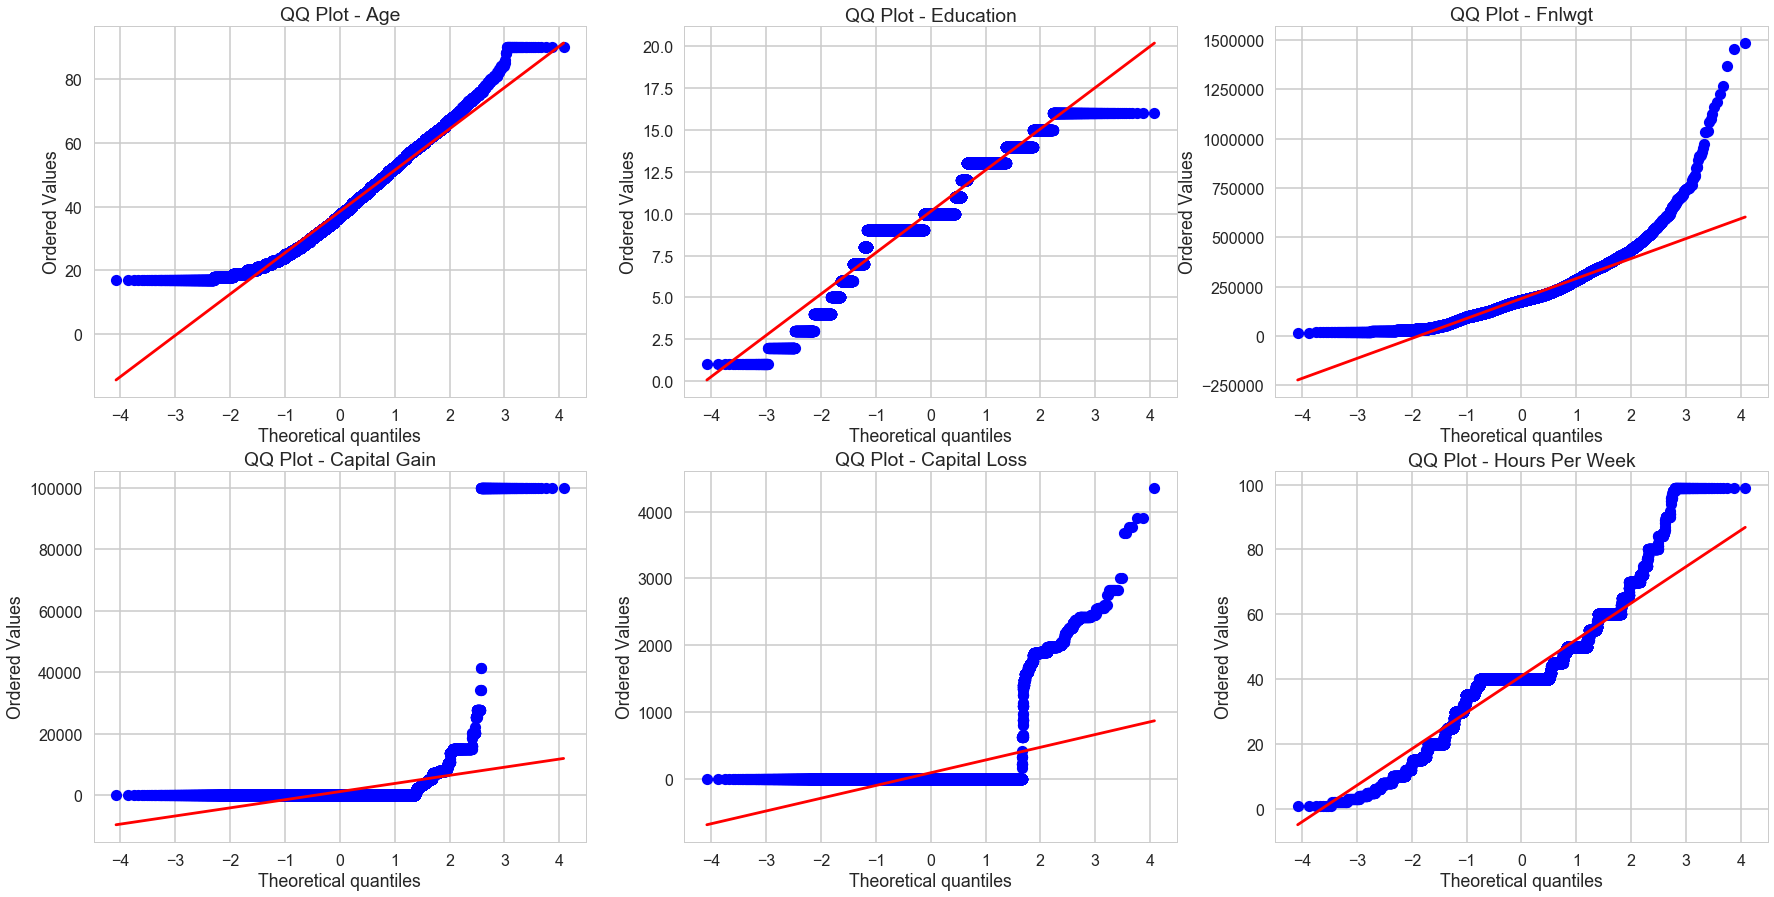

In [19]:
'''
Plotting the distribution for each numeric variable using qq-plots against Gaussian.
The more linear the plot (straight line, 45 degree angle), the distribution is closer
to Normal Distribution. If the qq-plot follows a S-shape, the distribution is more skewed
compared to the Normal Distribution.
'''

%pylab inline
plt.figure(figsize = (30, 15))

plt.subplot(2, 3, 1)
stats.probplot(census_data['age'], dist = "norm", plot = pylab)
plt.title('QQ Plot - Age')

plt.subplot(2, 3, 2)
stats.probplot(census_data['education_num'], dist = "norm", plot = pylab)
plt.title('QQ Plot - Education')

plt.subplot(2, 3, 3)
stats.probplot(census_data['fnlwgt'], dist = "norm", plot = pylab)
plt.title('QQ Plot - Fnlwgt')

plt.subplot(2, 3, 4)
stats.probplot(census_data['capital_gain'], dist = "norm", plot = pylab)
plt.title('QQ Plot - Capital Gain')

plt.subplot(2, 3, 5)
stats.probplot(census_data['capital_loss'], dist = "norm", plot = pylab)
plt.title('QQ Plot - Capital Loss')

plt.subplot(2, 3, 6)
stats.probplot(census_data['hours_per_week'], dist = "norm", plot = pylab)
plt.title('QQ Plot - Hours Per Week')

pylab.show()

Observation:
* The features **age**, **education_num** and **hours_per_week** can be transformed to check if they approximate to normal distributions. Furthermore, these features can be **standardized** before modeling.

Populating the interactive namespace from numpy and matplotlib


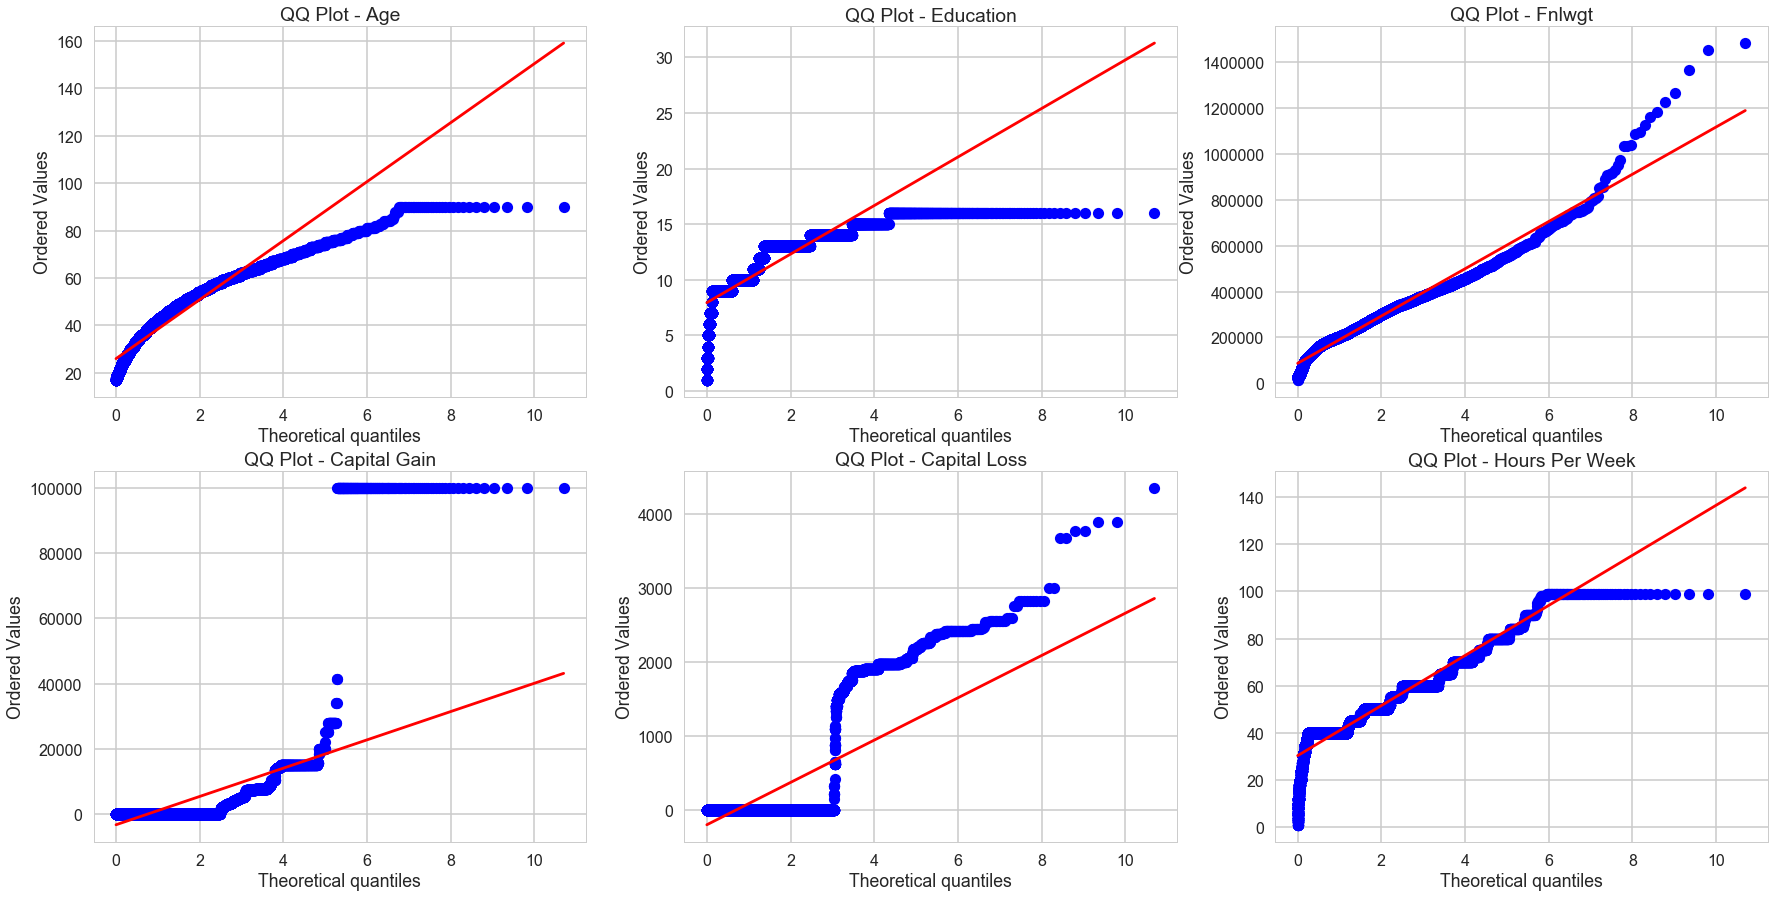

In [20]:
'''
Plotting the distribution for each numeric variable using qq-plots against Power Law Distribution.
The more linear the plot (straight line, 45 degree angle), the distribution is closer 
to Exponential. If the qq-plot follows a S-shape, the distribution is more skewed 
compared to the Exponential Distribution.
'''

%pylab inline
plt.figure(figsize = (30, 15))

plt.subplot(2, 3, 1)
stats.probplot(census_data['age'], dist = "expon", plot = pylab)
plt.title('QQ Plot - Age')

plt.subplot(2, 3, 2)
stats.probplot(census_data['education_num'], dist = "expon", plot = pylab)
plt.title('QQ Plot - Education')

plt.subplot(2, 3, 3)
stats.probplot(census_data['fnlwgt'], dist = "expon", plot = pylab)
plt.title('QQ Plot - Fnlwgt')

plt.subplot(2, 3, 4)
stats.probplot(census_data['capital_gain'], dist = "expon", plot = pylab)
plt.title('QQ Plot - Capital Gain')

plt.subplot(2, 3, 5)
stats.probplot(census_data['capital_loss'], dist = "expon", plot = pylab)
plt.title('QQ Plot - Capital Loss')

plt.subplot(2, 3, 6)
stats.probplot(census_data['hours_per_week'], dist = "expon", plot = pylab)
plt.title('QQ Plot - Hours Per Week')

pylab.show()

Observations:
* The feature **fnlwgt** has a distribution closer to exponential. This feature can be transformed before modeling.

Check correlation of each feature w.r.t to salary: 
                     age    fnlwgt  education_num  capital_gain  capital_loss  hours_per_week    salary
age             1.000000 -0.076540       0.043567      0.080392      0.060409        0.101879  0.242431
fnlwgt         -0.076540  1.000000      -0.043509     -0.000189     -0.010011       -0.022810 -0.009446
education_num   0.043567 -0.043509       1.000000      0.124247      0.079321        0.151241  0.334640
capital_gain    0.080392 -0.000189       0.124247      1.000000     -0.032332        0.079548  0.221871
capital_loss    0.060409 -0.010011       0.079321     -0.032332      1.000000        0.053961  0.151461
hours_per_week  0.101879 -0.022810       0.151241      0.079548      0.053961        1.000000  0.228547
salary          0.242431 -0.009446       0.334640      0.221871      0.151461        0.228547  1.000000


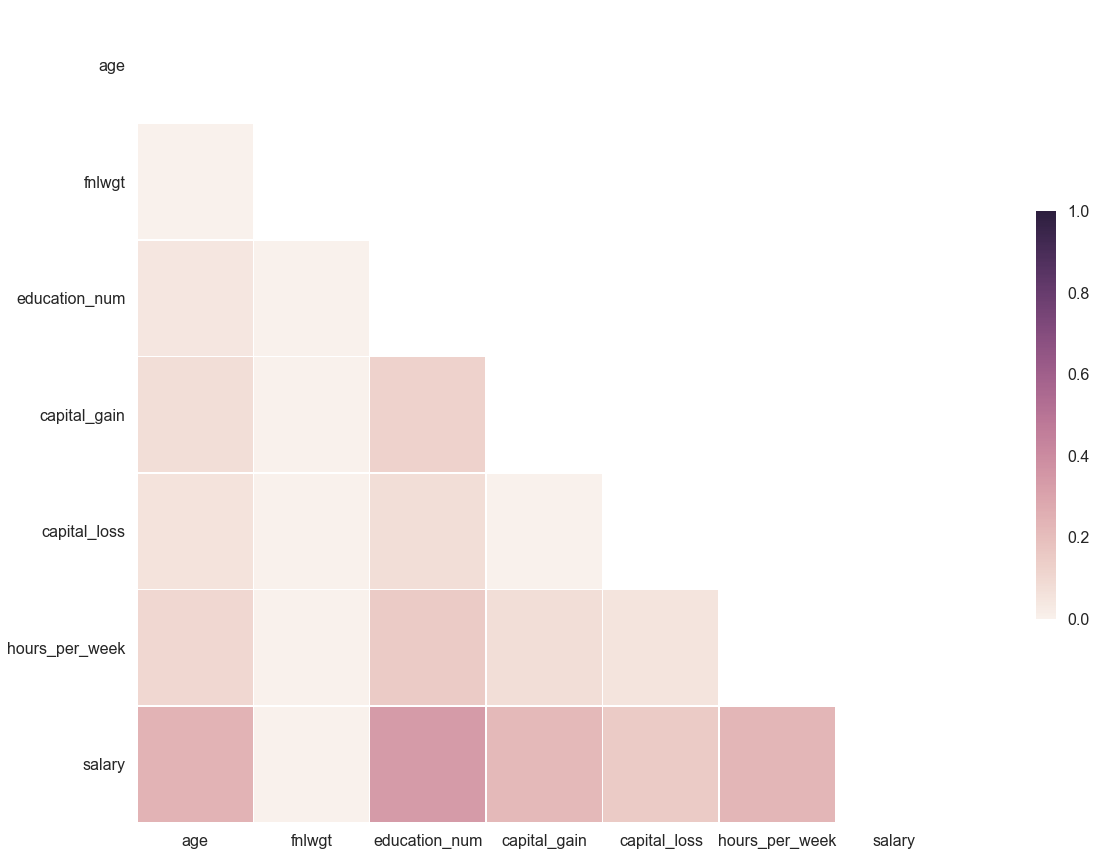

In [21]:
'''
Pearson Correlation Matrix for numeric variables.
'''

print "Check correlation of each feature w.r.t to salary: "
print census_data.corr()

plt.figure(figsize = (30, 15))
mask = np.zeros_like(census_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(census_data.corr(), 
            mask = mask, 
            square = True, 
            linewidths = 0.5, 
            vmin = 0, 
            vmax = 1, 
            cbar_kws = {"shrink": .5})

Observations:
* **fnlwgt** is highly **uncorrelated** with the salary and thus might not be an important feature to model salary. However, a transformed fnlwgt feature might have a higher correlation.
* No strong **multicolinearity** exists within the features. Except for fnlwgt, other features have a significant correlation with salary and thus will be selected to model, only after a deeper analysis.

### B. CATEGORICAL FEATURES

First, we can **check the distribution of the categories** for the categorical features. Once again, we need to **look out for features having a very narrow distribution** (most of the values fall in one category). Optionally, we can look for the categories which have an **even distribution** (50/50) w.r.t to the dependent variable and **merge** these categories if the number of categories are high.

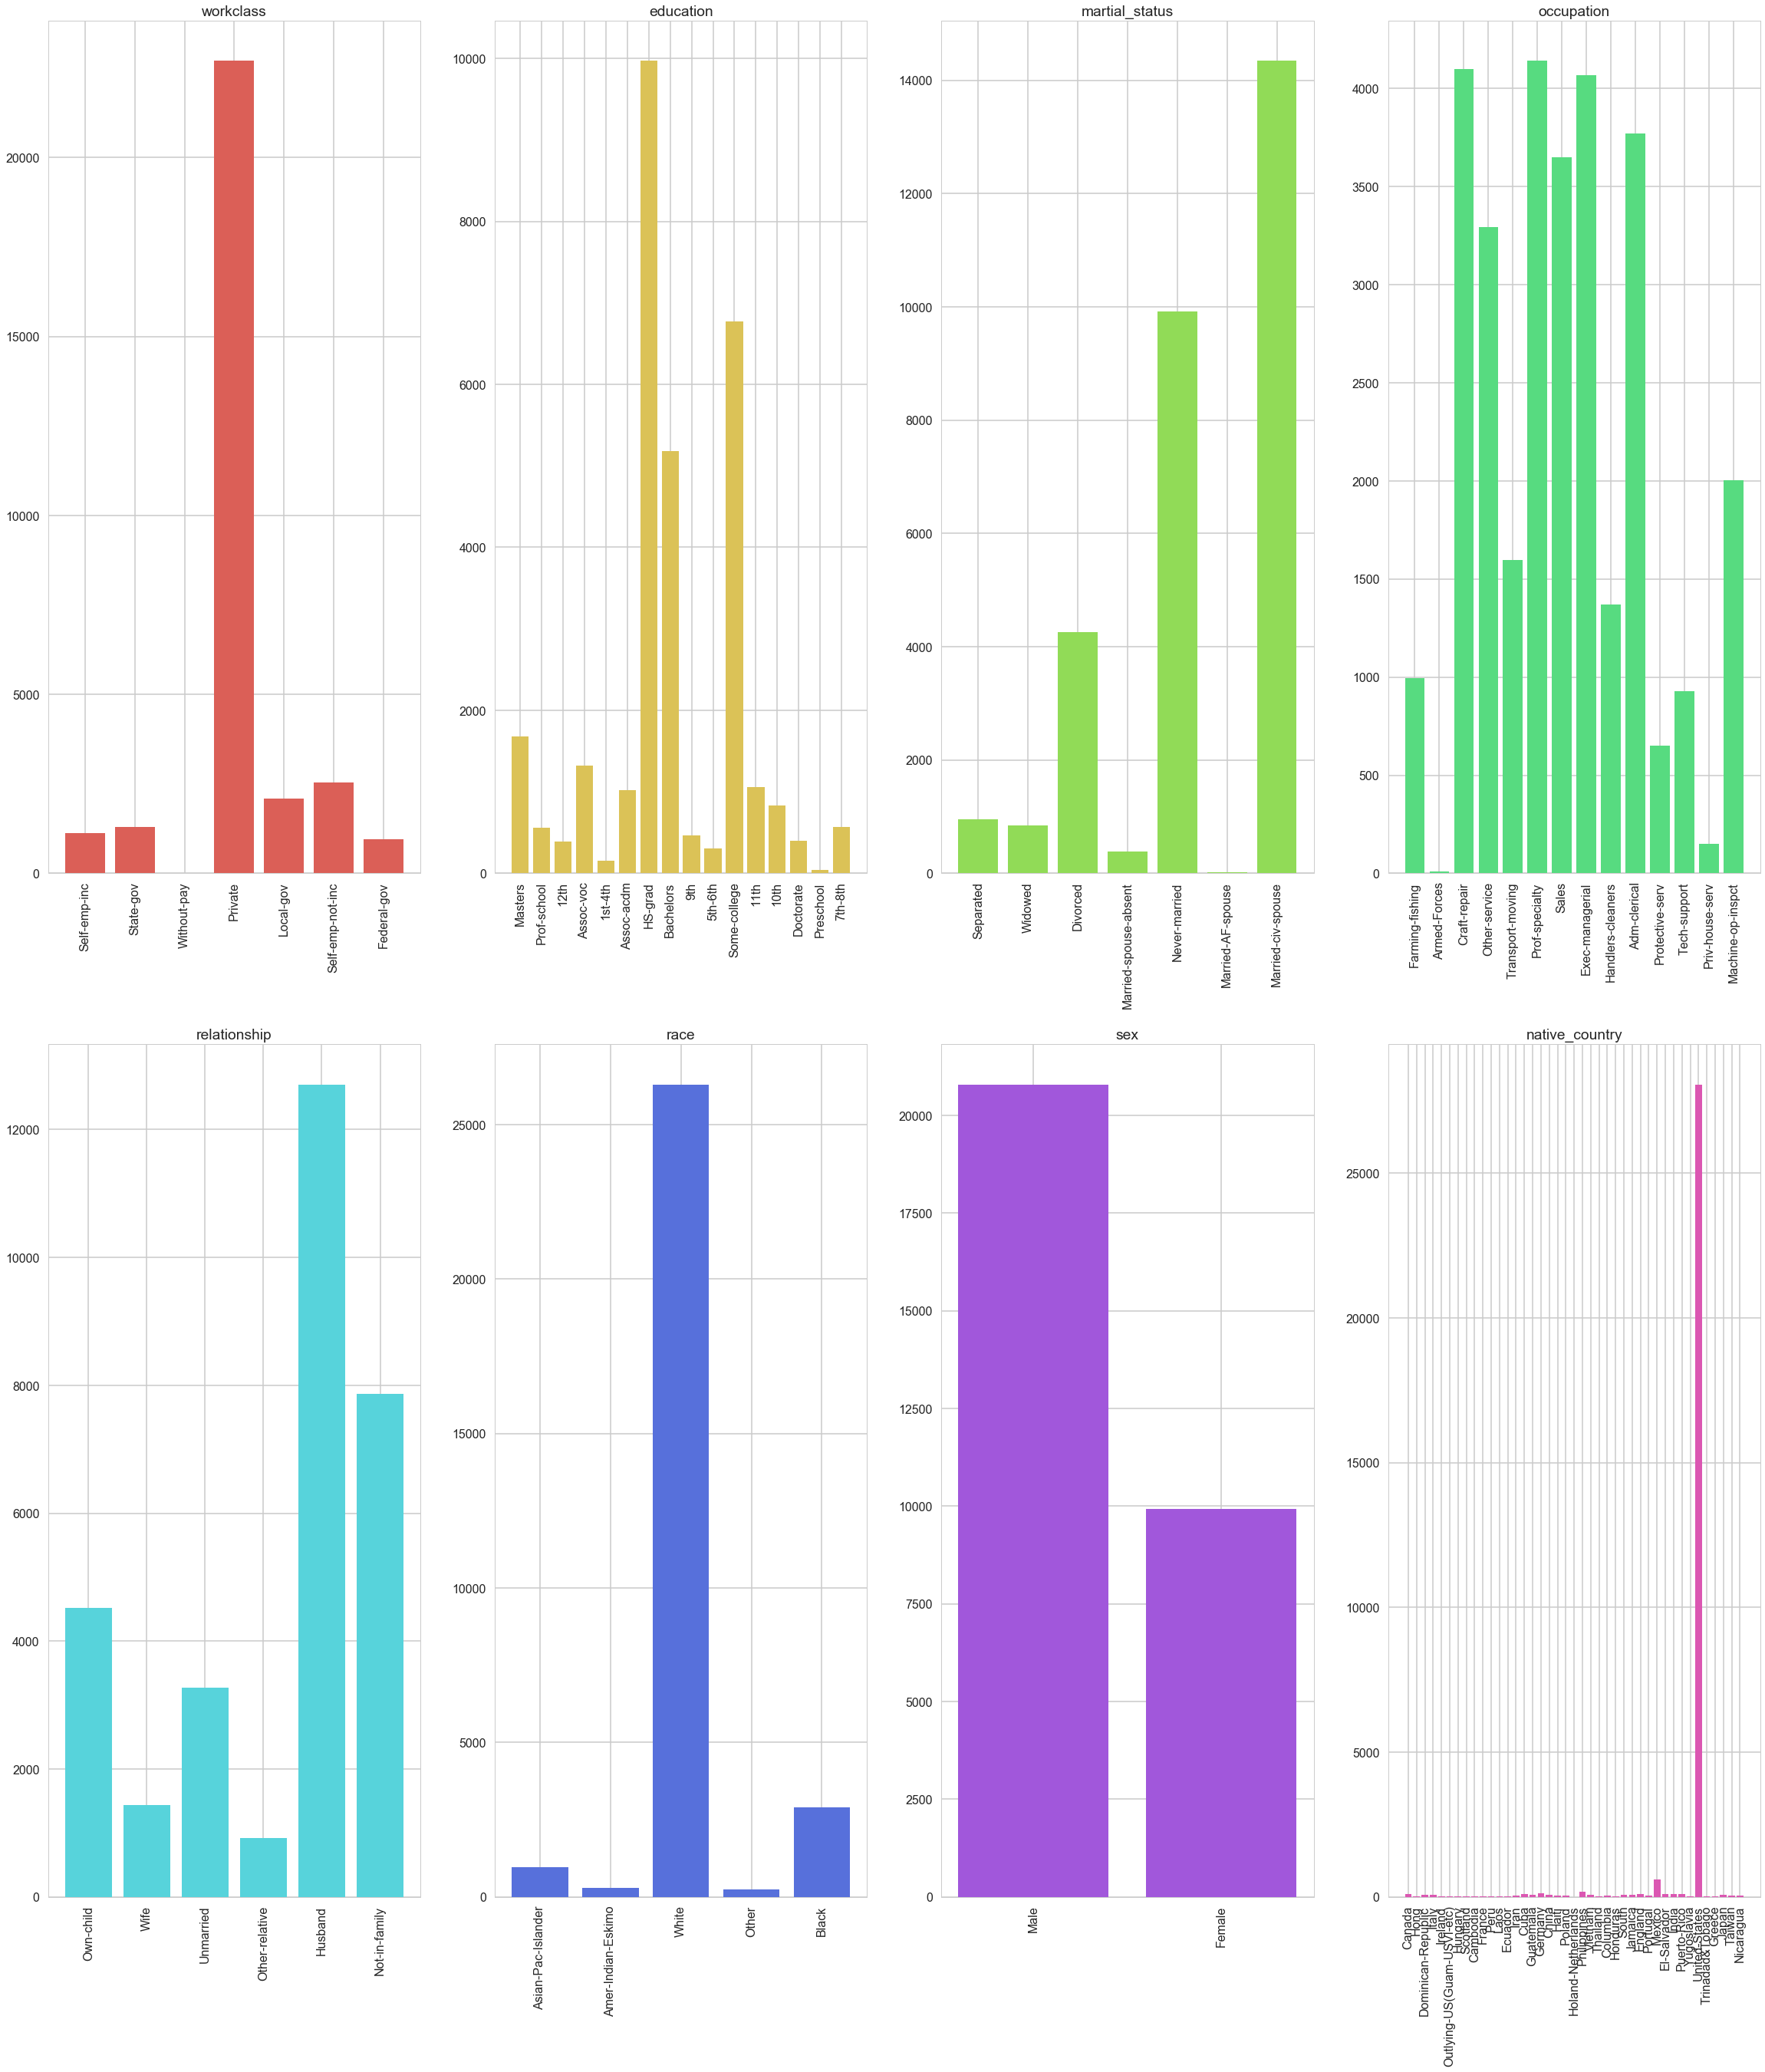

In [22]:
'''
Plot the distribution of the categories for categorical features as a bar plot.
The bar plot shows the frequency of the categorical variable.
'''

workclass = dict(census_data['workclass'].value_counts())
education = dict(census_data['education'].value_counts())
martial_status = dict(census_data['martial_status'].value_counts())
occupation = dict(census_data['occupation'].value_counts())
relationship = dict(census_data['relationship'].value_counts())
race = dict(census_data['race'].value_counts())
sex = dict(census_data['sex'].value_counts())
native_country = dict(census_data['native_country'].value_counts())

plt.figure(figsize = (40, 45))
colors1 = sns.color_palette("hls", 8)

plt.subplot(2, 4, 1)
plt.bar(range(len(workclass)), workclass.values(), align='center', color = colors1[0])
plt.xticks(range(len(workclass)), workclass.keys(), rotation = 90)
plt.title('workclass')

plt.subplot(2, 4, 2)
plt.bar(range(len(education)), education.values(), align='center', color = colors1[1])
plt.xticks(range(len(education)), education.keys(), rotation = 90)
plt.title('education')

plt.subplot(2, 4, 3)
plt.bar(range(len(martial_status)), martial_status.values(), align='center', color = colors1[2])
plt.xticks(range(len(martial_status)), martial_status.keys(), rotation = 90)
plt.title('martial_status')

plt.subplot(2, 4, 4)
plt.bar(range(len(occupation)), occupation.values(), align='center', color = colors1[3])
plt.xticks(range(len(occupation)), occupation.keys(), rotation = 90)
plt.title('occupation')

plt.subplot(2, 4, 5)
plt.bar(range(len(relationship)), relationship.values(), align='center', color = colors1[4])
plt.xticks(range(len(relationship)), relationship.keys(), rotation = 90)
plt.title('relationship')

plt.subplot(2, 4, 6)
plt.bar(range(len(race)), race.values(), align='center', color = colors1[5])
plt.xticks(range(len(race)), race.keys(), rotation = 90)
plt.title('race')

plt.subplot(2, 4, 7)
plt.bar(range(len(sex)), sex.values(), align='center', color = colors1[6])
plt.xticks(range(len(sex)), sex.keys(), rotation = 90)
plt.title('sex')

plt.subplot(2, 4, 8)
plt.bar(range(len(native_country)), native_country.values(), align='center', color = colors1[7])
plt.xticks(range(len(native_country)), native_country.keys(), rotation = 90)
plt.title('native_country')

plt.show()

Observation:
* Since **native_country** has an **extremely narrow distribution**, this feature can be **excluded** from the model as most the values fall under only one category (United-States). Such a variable can act as noise in our model.

In [23]:
'''
Drop native_country
'''

del census_data['native_country']

Now we can look for categories having an even distribution w.r.t. salary,  using a mosaic plot, and merge such categories.

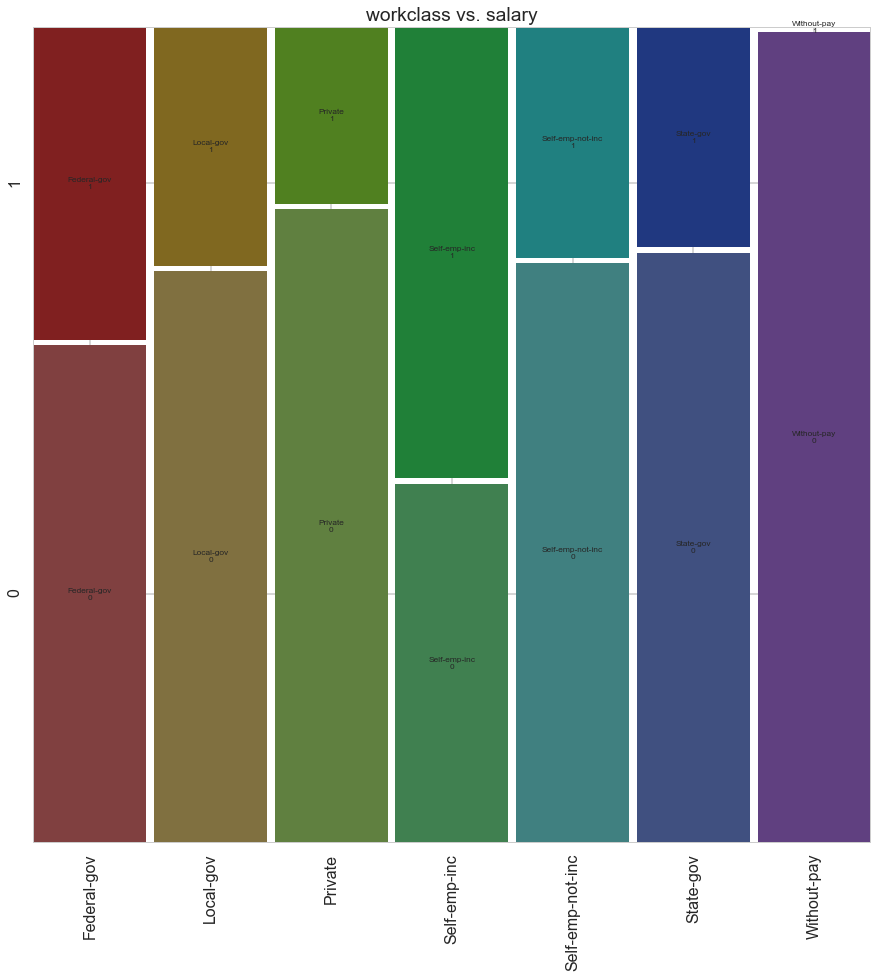

In [24]:
'''
Check % distribution of workclass w.r.t. salary
'''

f, axs = plt.subplots(1, 1, figsize = (15, 15))
tab = pd.crosstab(census_data['workclass'], census_data['salary']).apply(lambda r: r/r.sum() * 100, axis=1).round(3)
mosaic(tab.stack(), ax= axs, label_rotation = 90, gap = 0.01, title = 'workclass vs. salary')
plt.show()

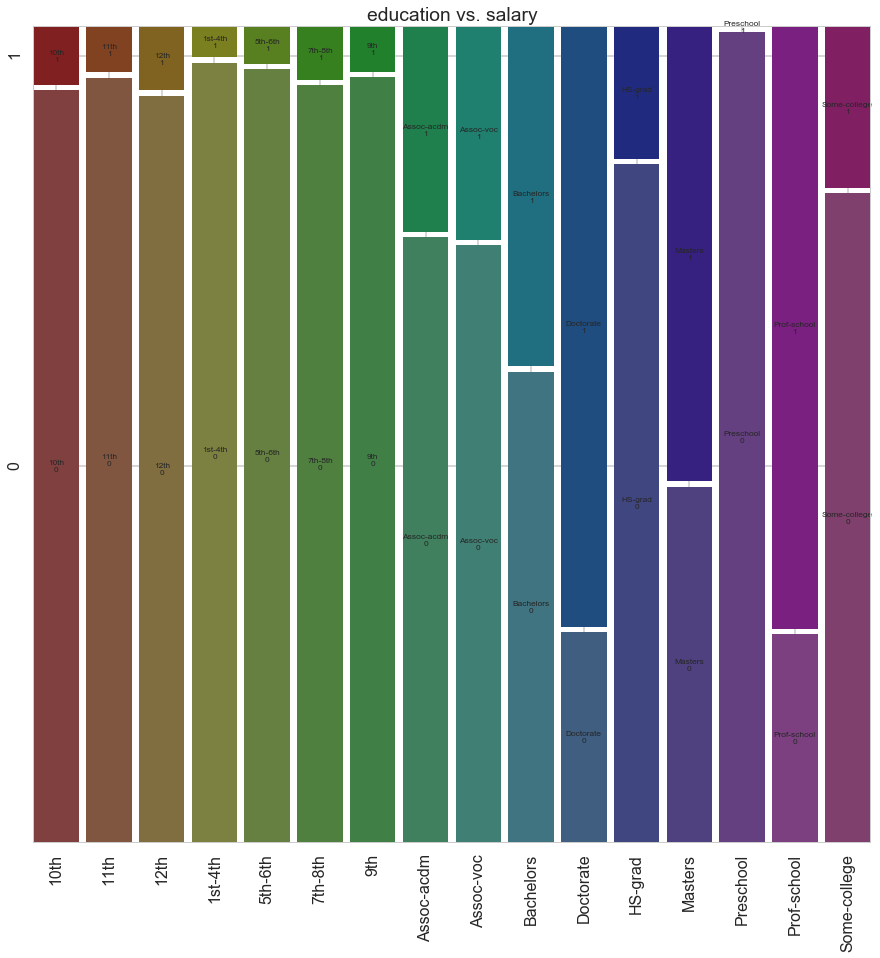

In [25]:
'''
Check % distribution of education w.r.t salary
'''

f, axs = plt.subplots(1, 1, figsize=(15, 15))
tab = pd.crosstab(census_data['education'], census_data['salary']).apply(lambda r: r/r.sum() * 100, axis=1).round(3)
mosaic(tab.stack(), ax= axs, label_rotation = 90, gap = 0.01, title = 'education vs. salary')
plt.show()

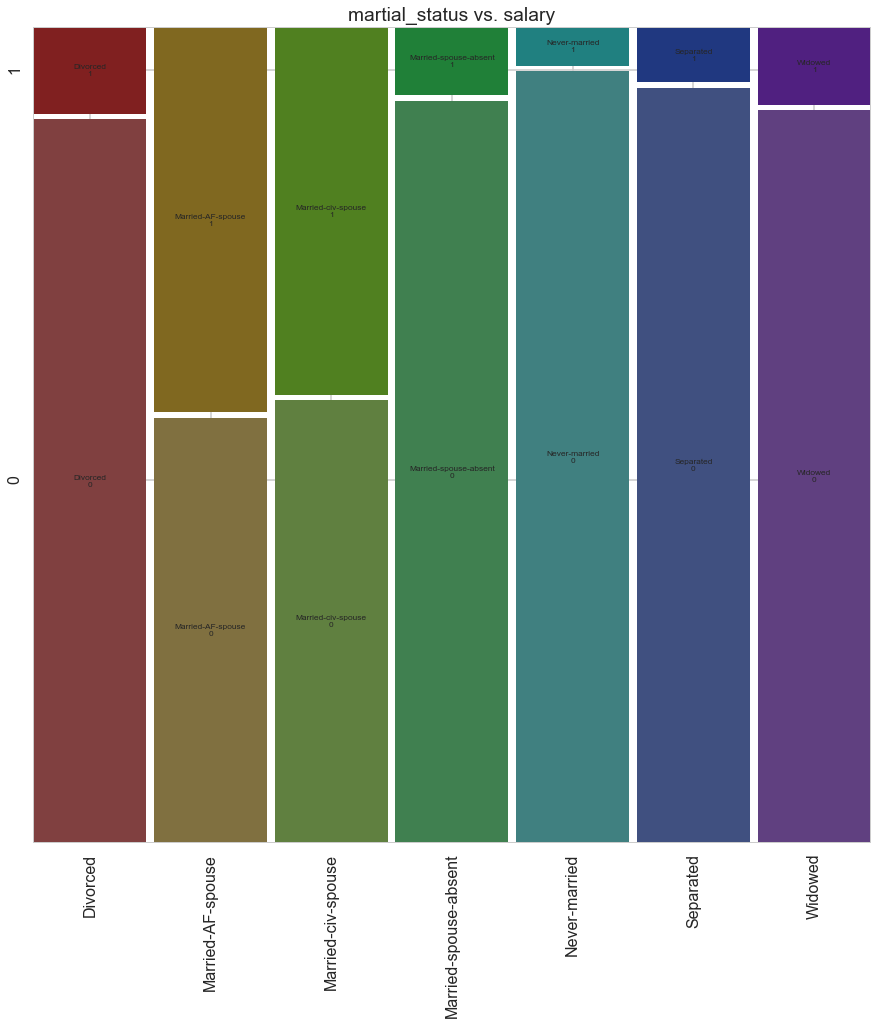

In [26]:
'''
Check % distribution of martial_status
'''

f, axs = plt.subplots(1, 1, figsize = (15, 15))
tab = pd.crosstab(census_data['martial_status'], census_data['salary']).apply(lambda r: r/r.sum() * 100, axis=1).round(3)
mosaic(tab.stack(), ax= axs, label_rotation = 90, gap = 0.01, title = 'martial_status vs. salary')
plt.show()

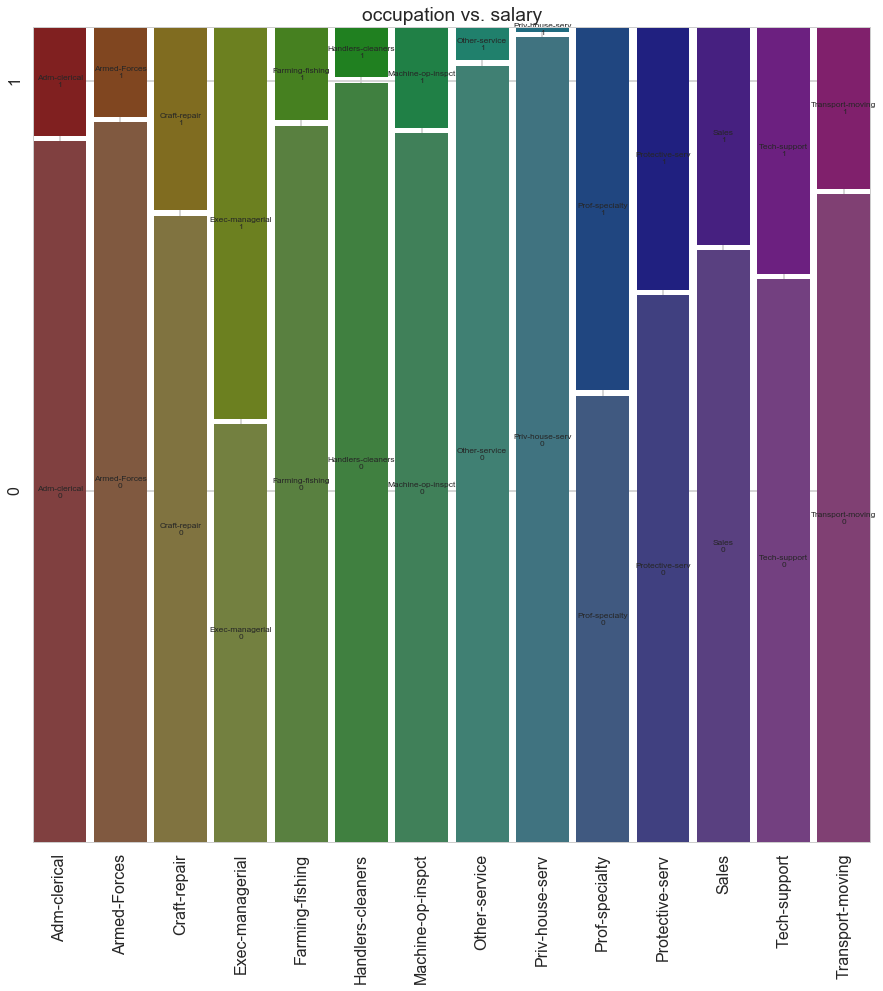

In [27]:
'''
Check % distribution of occupation
'''

f, axs = plt.subplots(1, 1, figsize=(15, 15))
tab = pd.crosstab(census_data['occupation'], census_data['salary']).apply(lambda r: r/r.sum() * 100, axis=1).round(3)
mosaic(tab.stack(), ax = axs, label_rotation = 90, gap = 0.01, title = 'occupation vs. salary')
plt.show()

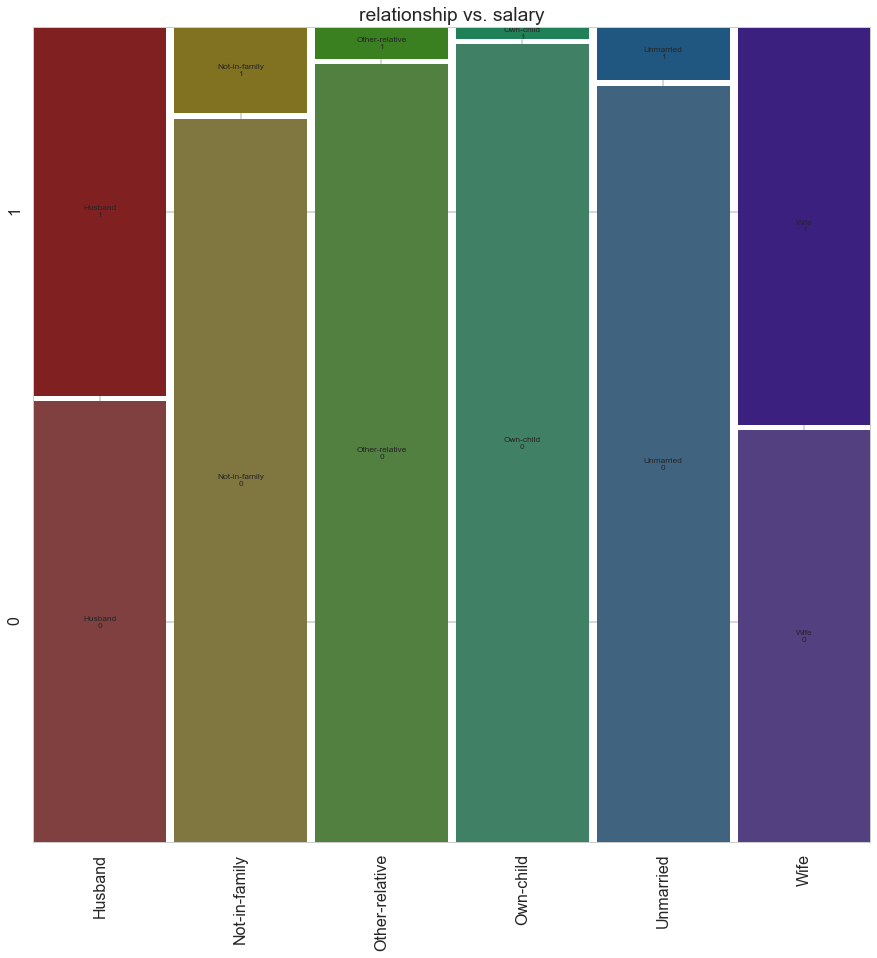

In [28]:
'''
Check % distribution of relationship
'''

f, axs = plt.subplots(1, 1, figsize=(15, 15))
tab = pd.crosstab(census_data['relationship'], census_data['salary']).apply(lambda r: r/r.sum() * 100, axis=1).round(3)
mosaic(tab.stack(), ax= axs, label_rotation = 90, gap = 0.01, title = 'relationship vs. salary')
plt.show()

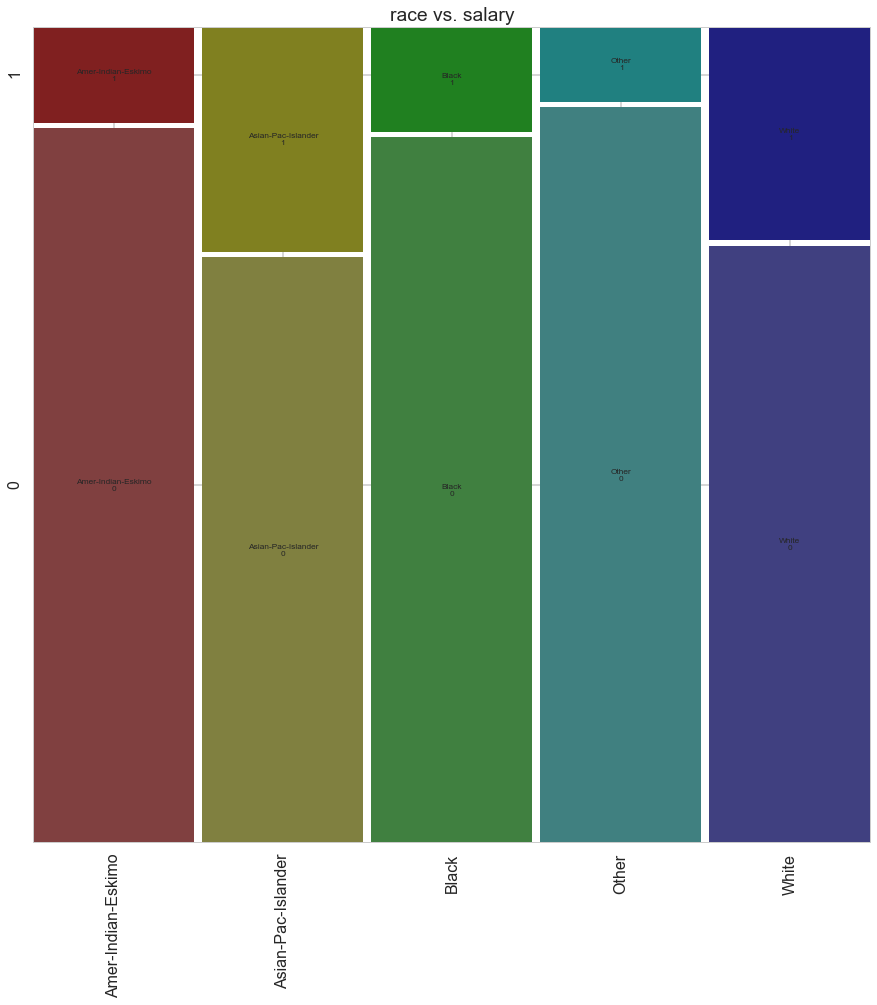

In [29]:
'''
Check % distribution of race
'''

f, axs = plt.subplots(1, 1, figsize = (15, 15))
tab = pd.crosstab(census_data['race'], census_data['salary']).apply(lambda r: r/r.sum() * 100, axis=1).round(3)
mosaic(tab.stack(), ax= axs, label_rotation = 90, gap = 0.01, title = 'race vs. salary')
plt.show()

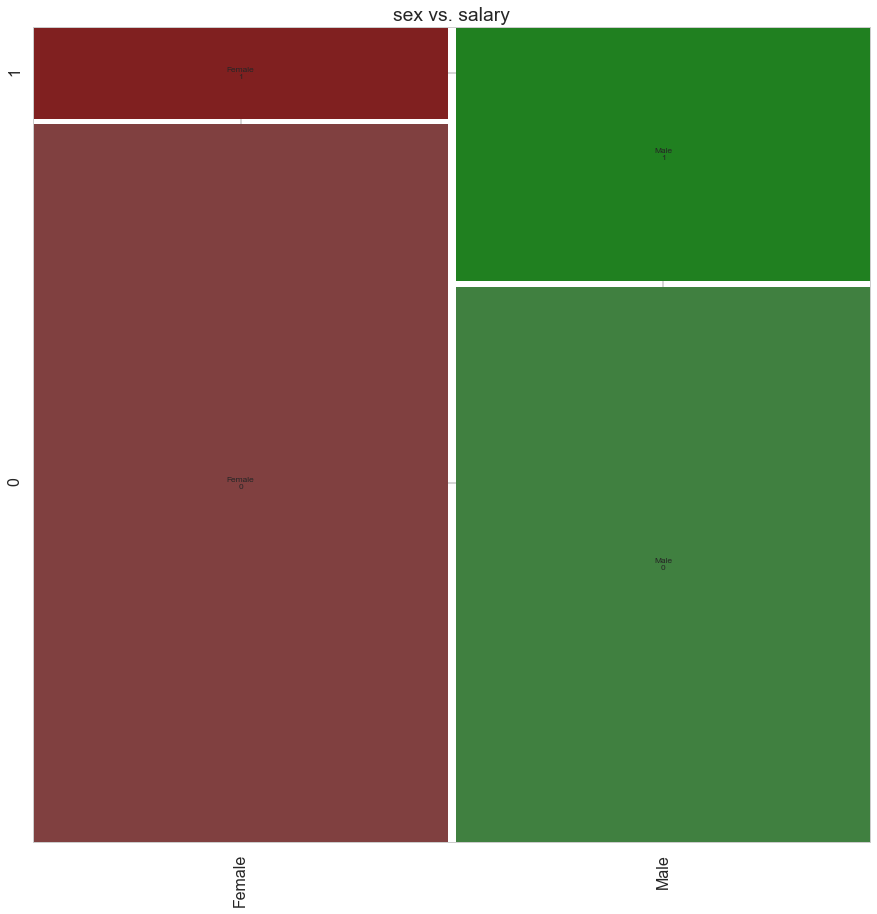

In [30]:
'''
Check % distribution of sex
'''

f, axs = plt.subplots(1, 1, figsize = (15, 15))
tab = pd.crosstab(census_data['sex'], census_data['salary']).apply(lambda r: r/r.sum() * 100, axis=1).round(3)
mosaic(tab.stack(), ax = axs, label_rotation = 90, gap = 0.01, title = 'sex vs. salary')
plt.show()

Observations:
* We can merge the **self-emp-not-inc** and **state-gov** categories of the **workclass** feature. However, we will not do this here because workclass only has 8 categoies which are not that many. Furthermore, merging would not be logically interpretable in this case.
* For the **education** feature, we can create 2 merged categories:
    * **1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th, 12th** can be merged to a common category **'school'**.
    * **Assoc_acdm** & **Assoc_voc** can be merged to a common category **'Assoc'**
* For the **martial_status** feature, we can create 2 merged categories:
    * **Married-AF-spouse** & **Married-civ-spouse** can be merged to a common category **'Married'**
    * **Married-spouse-absent, Never-married, Separated** & **Widowed** can be merged to a common category **'NoSpouse'**
* We can merge various categories for the **occupation** feature. However, we will not do this here because merging would not be logically interpretable in this case.
* We can merge the **Husband** and **Wife** categories for the **relationship** feature as **'Couple'**.
* For the rest of the categories, **race & sex**, we will not merge any categories as they would not be logically interpretable and the number of categories are not high.

## 4. FEATURE ENGINEERING

### A. AGE

We can check the distribution of age w.r.t. salary calegories to determine which age groups make the most/least money.

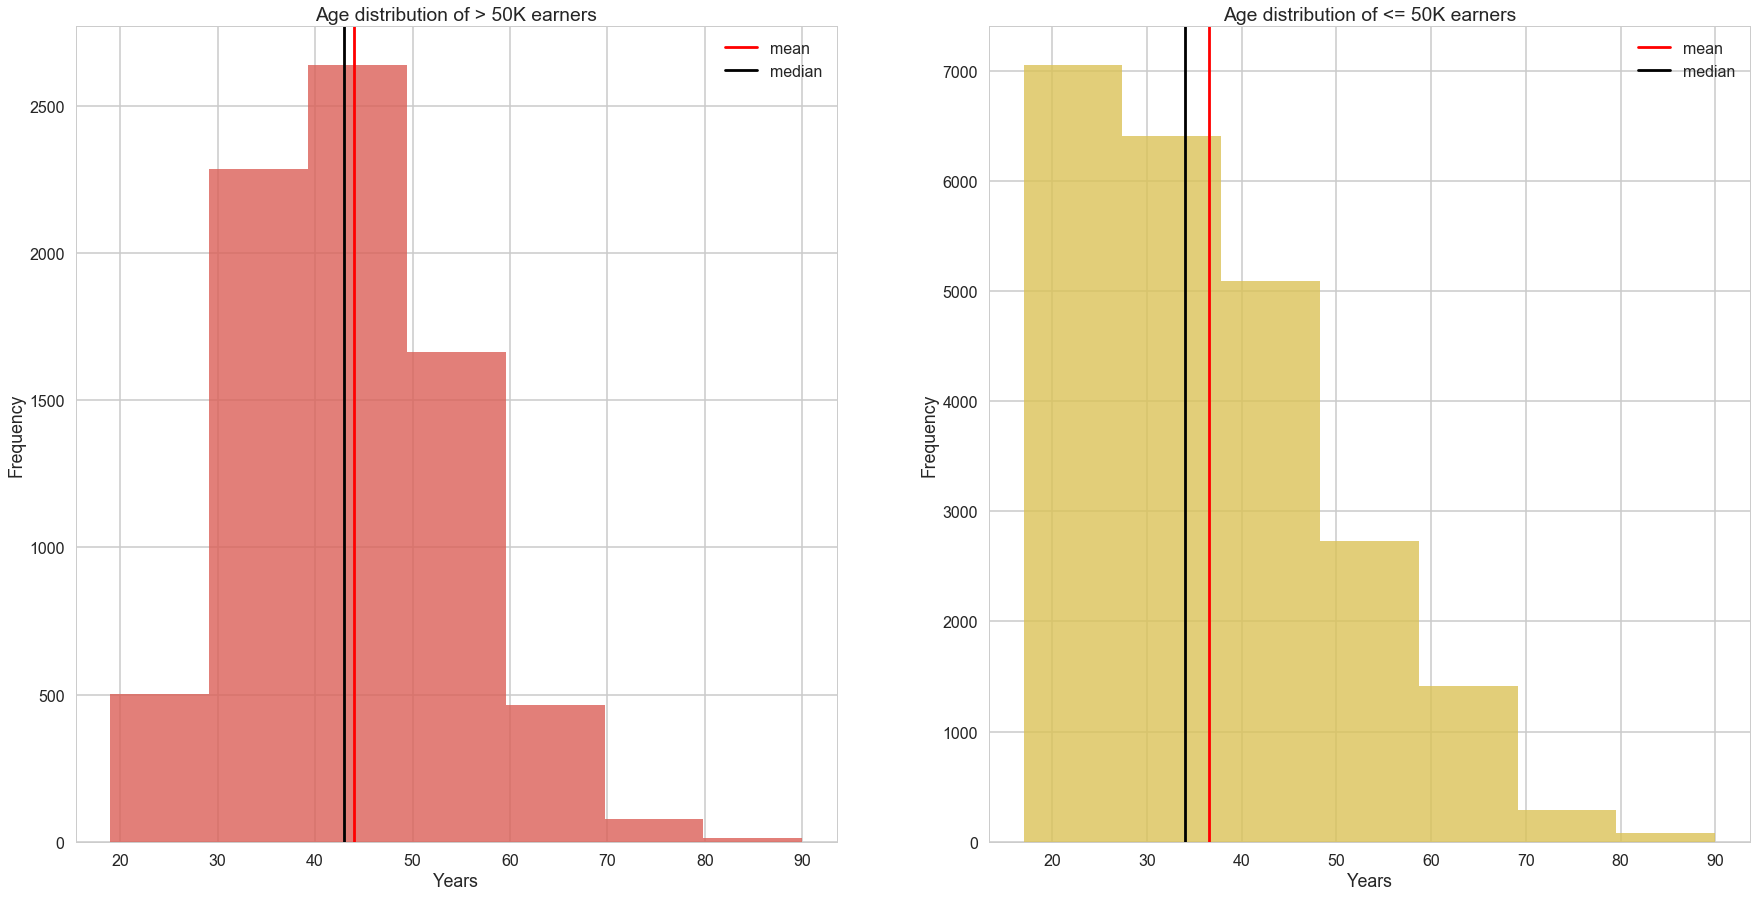

In [31]:
'''
The bar plot shows the count for <= 50K and > 50k for each age group.
'''

plt.figure(figsize = (30, 15))
colors = sns.color_palette("hls", 8)

#salary > 50K
plt.subplot(1, 2, 1)
plt.hist(census_data[census_data.salary == 1].age.values, bins = 7, facecolor = colors[0], alpha = 0.8)
plt.axvline(np.mean(census_data[census_data.salary == 1].age.values), 0, 1, color = 'red', label = 'mean')
plt.axvline(np.median(census_data[census_data.salary == 1].age.values), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')
plt.title('Age distribution of > 50K earners')
plt.xlabel('Years')
plt.ylabel('Frequency')

#salary <= 50K
plt.subplot(1, 2, 2)
plt.hist(census_data[census_data.salary == 0].age.values, bins = 7, facecolor = colors[1], alpha = 0.8)
plt.axvline(np.mean(census_data[census_data.salary == 0].age.values), 0, 1, color = 'red', label = 'mean')
plt.axvline(np.median(census_data[census_data.salary == 0].age.values), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')
plt.title('Age distribution of <= 50K earners')
plt.xlabel('Years')
plt.ylabel('Frequency')

We can see that people who **earn above 50K** are mostly aged between their **late 30s and mid 50s**, whereas people who earn **less than 50K** are primarily aged **between 20 and 30**. We can now apply transformations on this feature to reduce the skewness.

Populating the interactive namespace from numpy and matplotlib


C:\Users\RR5033675\AppData\Local\Continuum\Anaconda2_4.3.1\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


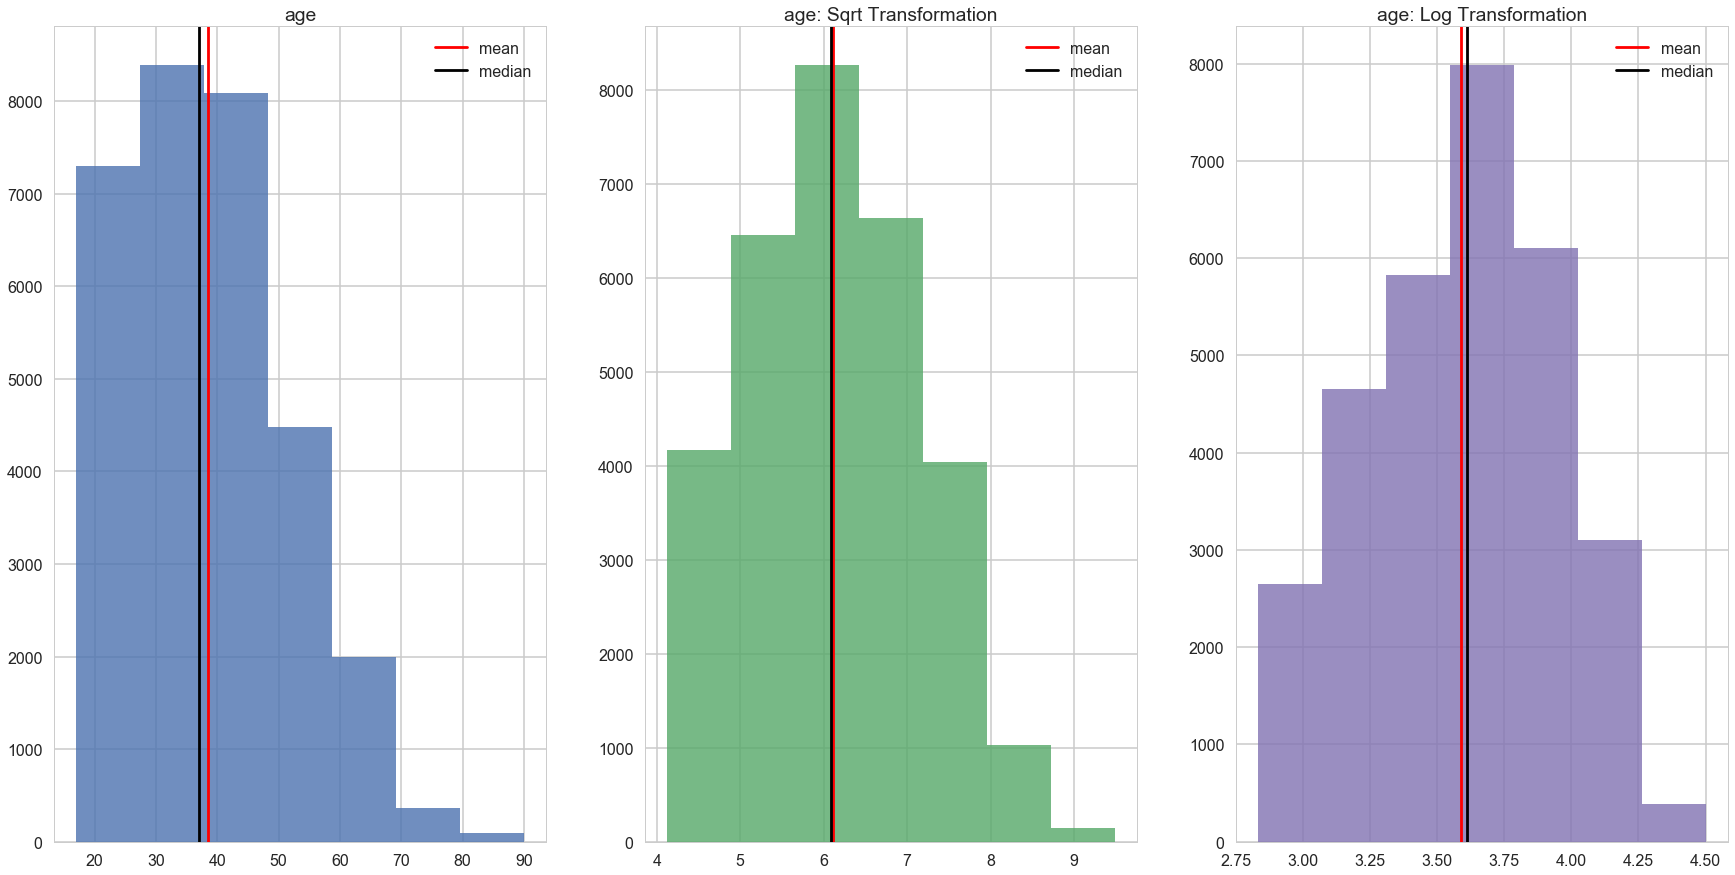

In [32]:
'''
Check the distribtion of age after applying square-root & log transformations
'''

%pylab inline
plt.figure(figsize = (30, 15))
colors = sns.color_palette()

plt.subplot(1, 3, 1)
plt.title('age')
census_data.age.hist(bins = 7, color = colors[0], alpha = 0.8)
plt.axvline(census_data['age'].mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(census_data['age'].median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

plt.subplot(1, 3, 2)
plt.title('age: Sqrt Transformation')
sqrt_transformed = census_data.age.apply(np.sqrt)
sqrt_transformed.hist(bins = 7, color = colors[1], alpha = 0.8)
plt.axvline(sqrt_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(sqrt_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

plt.subplot(1, 3, 3)
plt.title('age: Log Transformation')
log_transformed = (census_data.age).apply(np.log)
log_transformed.hist(bins = 7, color = colors[3], alpha = 0.8)
plt.axvline(log_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(log_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

The feature **age** is more closer to a normal distribution after **log transformation**. This feature will hence be transformed & standardized before modeling.

In [33]:
'''
Add log transformed age as a new feature
'''

census_data['age_transformed'] = (census_data.age).apply(np.log)

Furthermore, lets also check the distribution of age(log) w.r.t. the salary categories to make sure variation still exists in this feature.

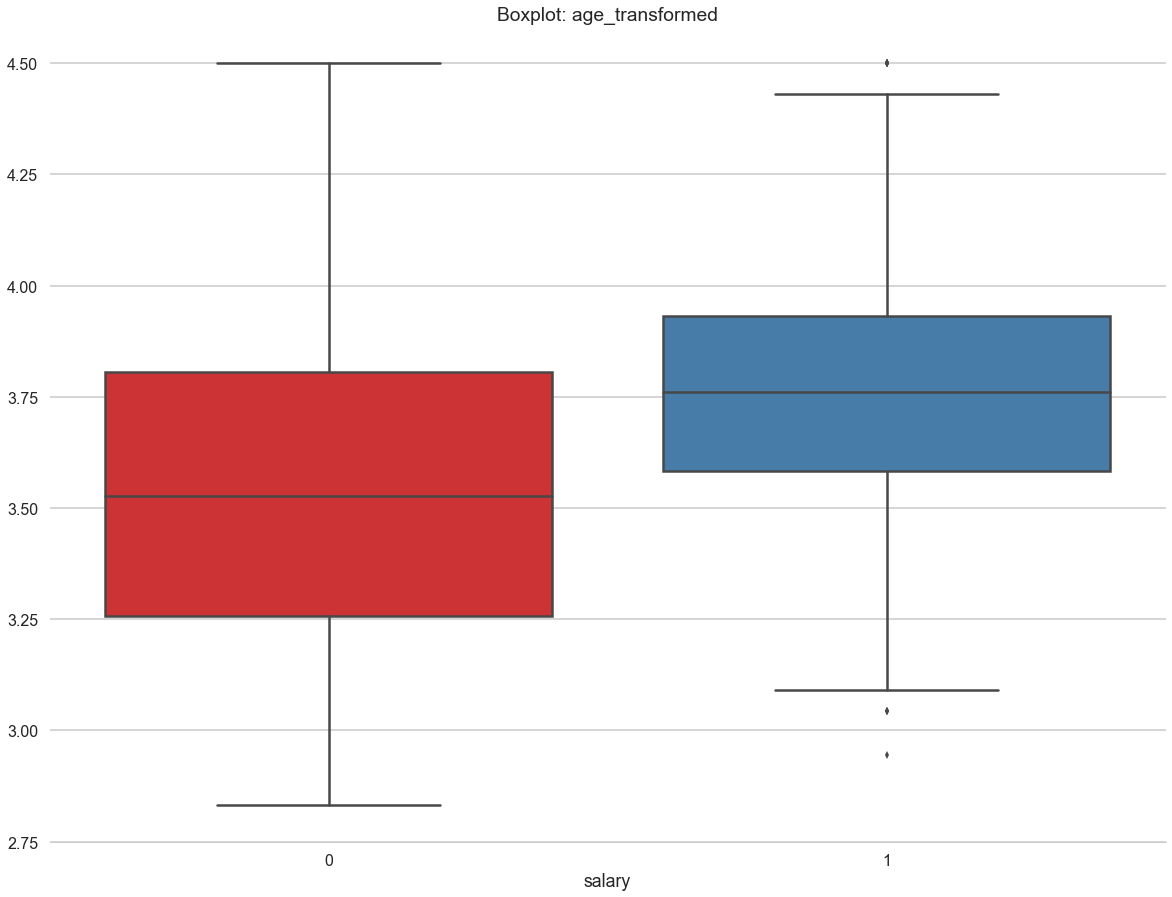

In [34]:
'''
Check distribution of age_transformed w.r.t. salary categories
'''

plt.figure(figsize=(20, 15))
sns.boxplot(x = "salary", y = "age_transformed", data = census_data, linewidth = 2.5, palette = "Set1")
plt.title('Boxplot: age_transformed')
ylabel('')
sns.despine(left= True)

At this point, **age_transformed** is ready for modeling. We can drop the original age feature. Furthermore, we can also **standardize** this feature since it now follows an approximate normal distribution.

In [35]:
census_data['age_transformed'] = (census_data['age_transformed'] - census_data['age_transformed'].mean())/census_data['age_transformed'].std()
del census_data['age']

### B. FNLWGT

We can check the distribution of fnlwgt w.r.t. salary categories to determine how fnlwgt affects salary.

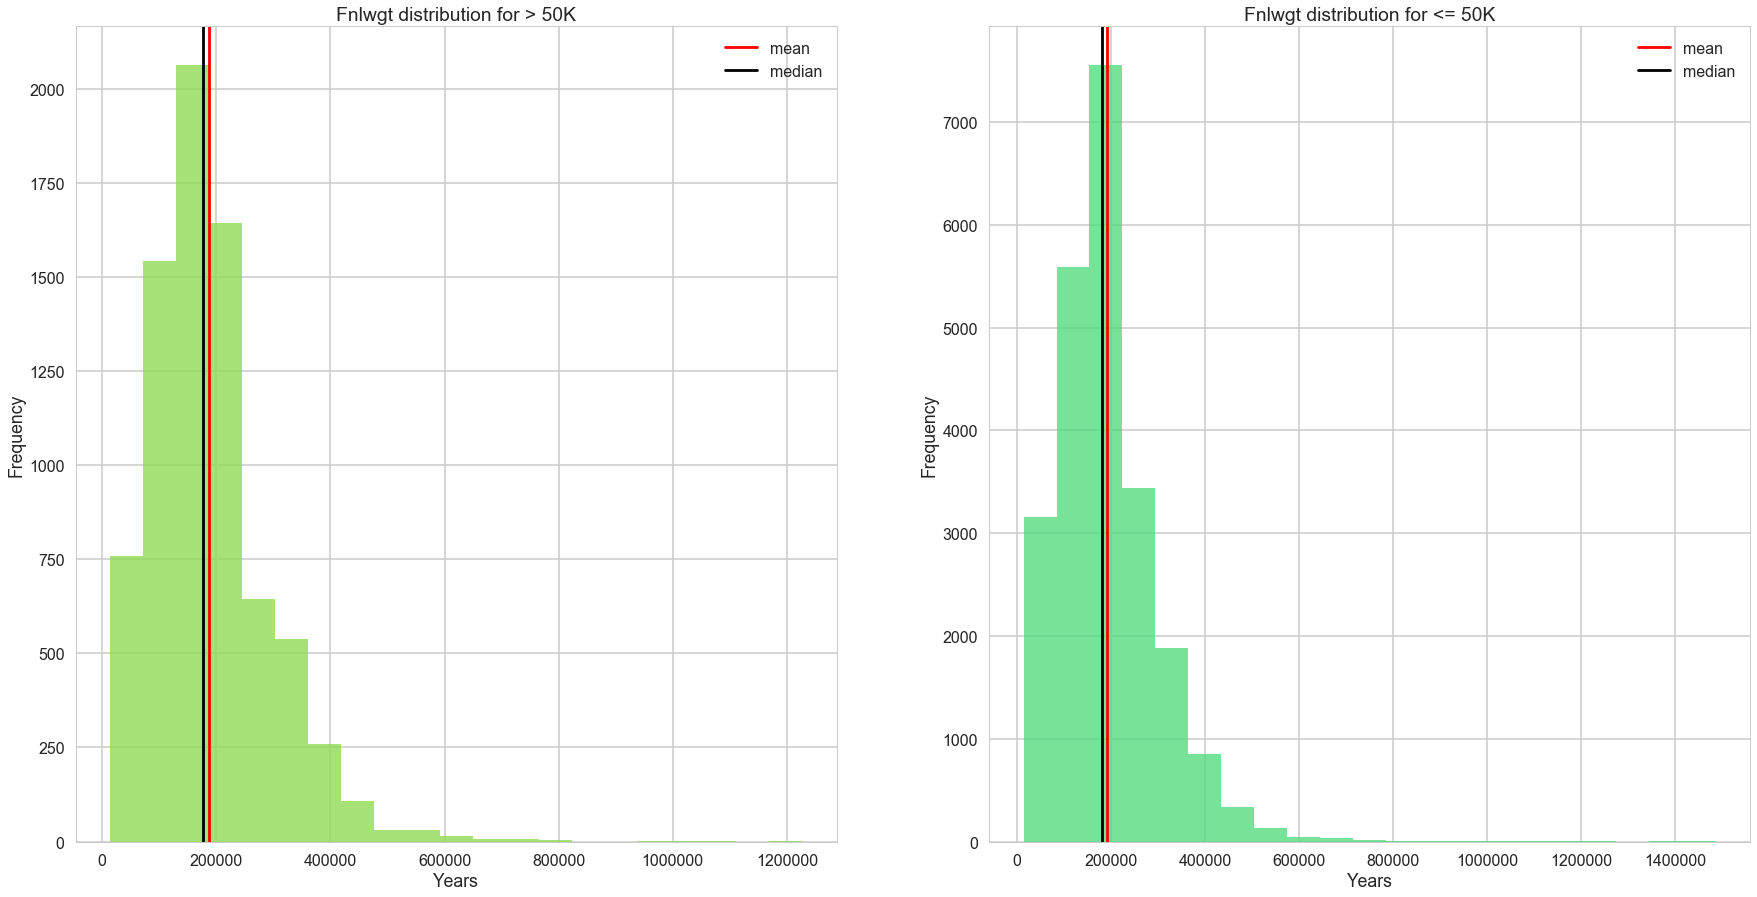

In [36]:
'''
The bar plot shows the count for <= 50K and > 50k for fnlwgt.
'''

plt.figure(figsize = (30, 15))
colors = sns.color_palette("hls", 8)

#salary > 50K
plt.subplot(1, 2, 1)
plt.hist(census_data[census_data.salary == 1].fnlwgt.values, bins = 21, facecolor = colors[2], alpha = 0.8)
plt.axvline(np.mean(census_data[census_data.salary == 1].fnlwgt.values), 0, 1, color = 'red', label = 'mean')
plt.axvline(np.median(census_data[census_data.salary == 1].fnlwgt.values), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')
plt.title('Fnlwgt distribution for > 50K')
plt.xlabel('Years')
plt.ylabel('Frequency')

#salary <= 50K
plt.subplot(1, 2, 2)
plt.hist(census_data[census_data.salary == 0].fnlwgt.values, bins = 21, facecolor = colors[3], alpha = 0.8)
plt.axvline(np.mean(census_data[census_data.salary == 0].fnlwgt.values), 0, 1, color = 'red', label = 'mean')
plt.axvline(np.median(census_data[census_data.salary == 0].fnlwgt.values), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')
plt.title('Fnlwgt distribution for <= 50K')
plt.xlabel('Years')
plt.ylabel('Frequency')

Looks like this distribution of fnlwgt is **almost identical** for both the categories! For this reason, this feautre should be dropped. However, we can check if a transformed fnlwgt feature adds any value. 

Populating the interactive namespace from numpy and matplotlib


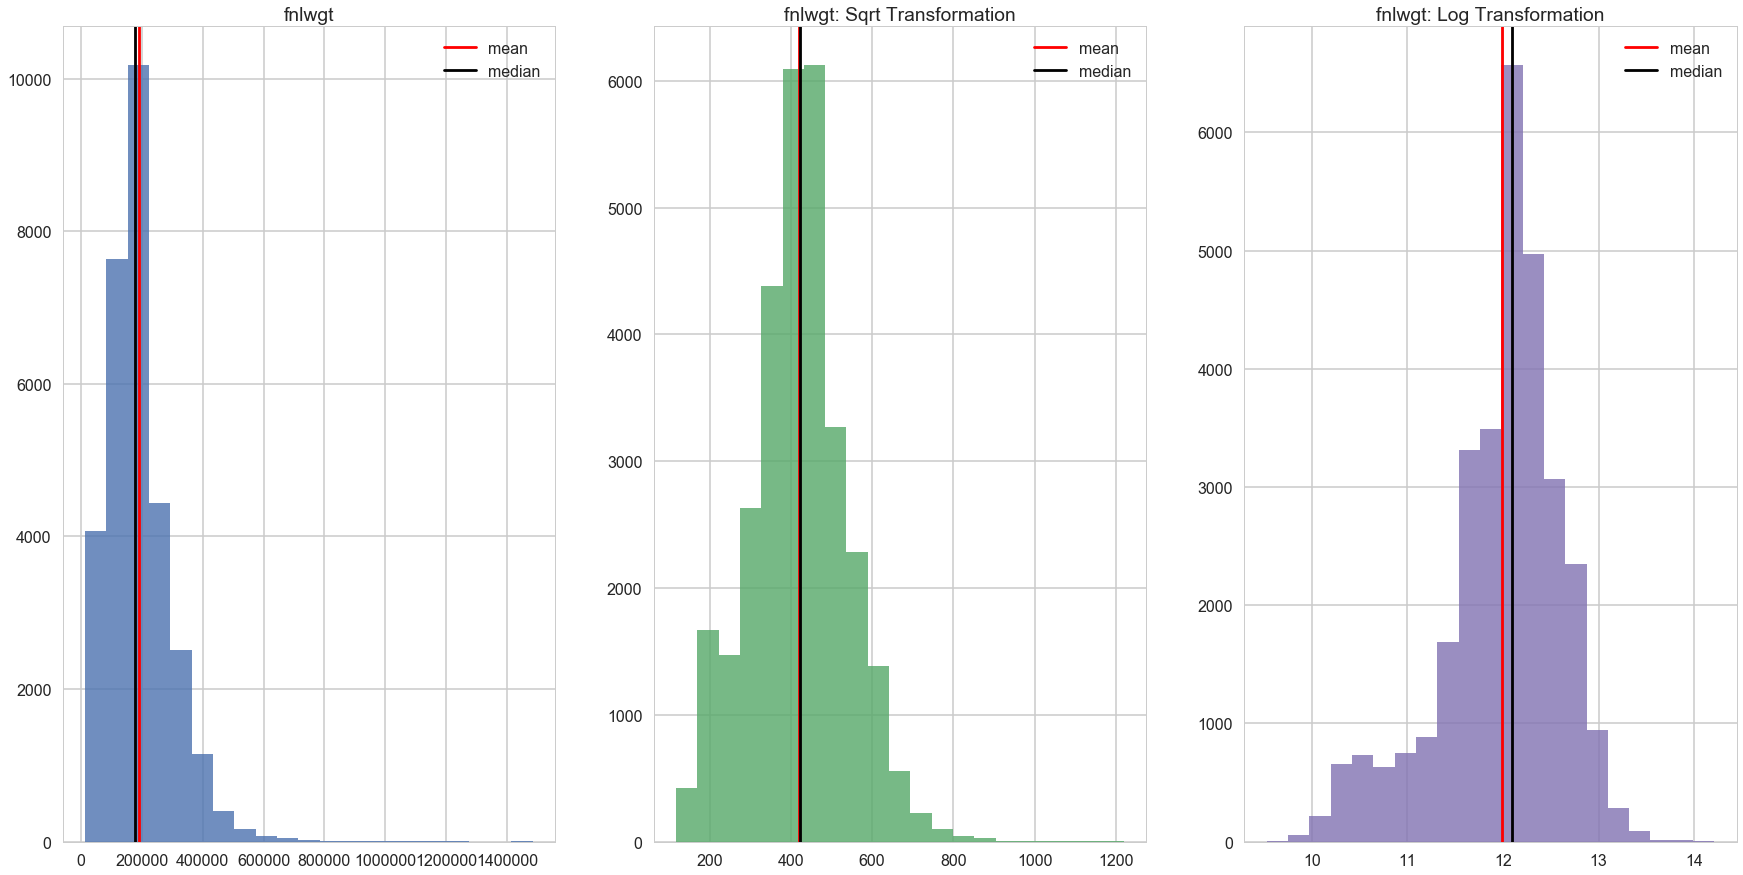

In [37]:
'''
Check the distribtion of fnlwgt after applying a square-root and log transformations
'''

%pylab inline
plt.figure(figsize = (30, 15))
colors = sns.color_palette()

plt.subplot(1, 3, 1)
plt.title('fnlwgt')
census_data.fnlwgt.hist(bins = 21, color = colors[0], alpha = 0.8)
plt.axvline(census_data['fnlwgt'].mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(census_data['fnlwgt'].median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

plt.subplot(1, 3, 2)
plt.title('fnlwgt: Sqrt Transformation')
sqrt_transformed = census_data.fnlwgt.apply(np.sqrt)
sqrt_transformed.hist(bins = 21, color = colors[1], alpha = 0.8)
plt.axvline(sqrt_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(sqrt_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

plt.subplot(1, 3, 3)
plt.title('fnlwgt: Log Transformation')
log_transformed = (census_data.fnlwgt+1).apply(np.log)
log_transformed.hist(bins = 21, color = colors[3], alpha = 0.8)
plt.axvline(log_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(log_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

The feature **fnlwgt** is closer to a normal distribution after **sq-root transformation**.

In [38]:
'''
Add sq-root transformed fnlwgt as a new feature
'''

census_data['fnlwgt_transformed'] = census_data.fnlwgt.apply(np.sqrt)

Furthermore, lets also check the distribution of the transfomed fnlwgt w.r.t. the salary categories to check the variation for this feature.

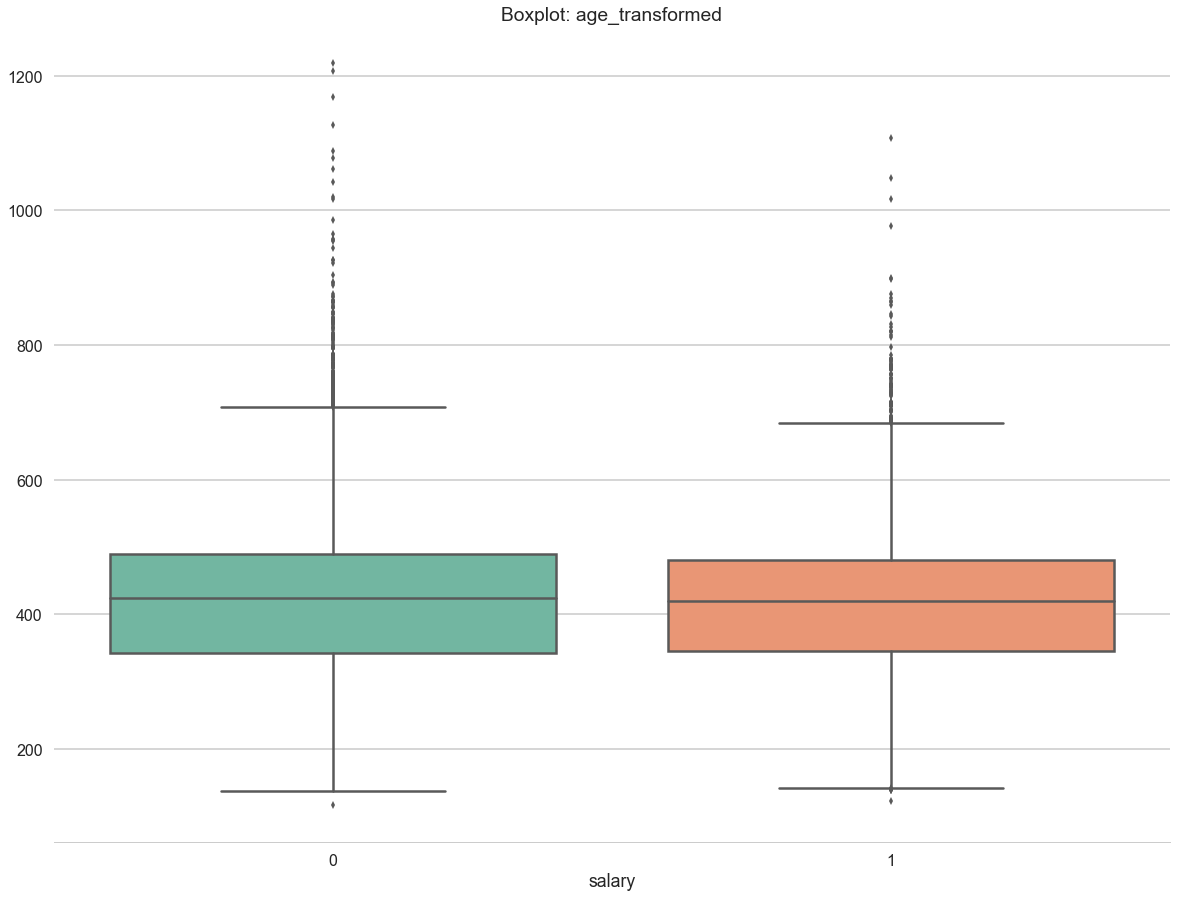

In [39]:
'''
Check distribution of fnlwgt_transformed w.r.t. salary categories
'''

plt.figure(figsize = (20, 15))
sns.boxplot(x = "salary", y = "fnlwgt_transformed", data = census_data, linewidth = 2.5, palette = "Set2")
plt.title('Boxplot: age_transformed')
ylabel('')
sns.despine(left = True)

We will **drop** the **fnlwgt** feature because it shows little to no variation w.r.t. salary. If added to the model, it can act as un-wanted noise.

In [40]:
'''
Drop fnlwgt related features
'''

del census_data['fnlwgt']
del census_data['fnlwgt_transformed']

### C. EDUCATION_NUM

We can check the distribution of education_num w.r.t. salary categories to determine how it affects salary.

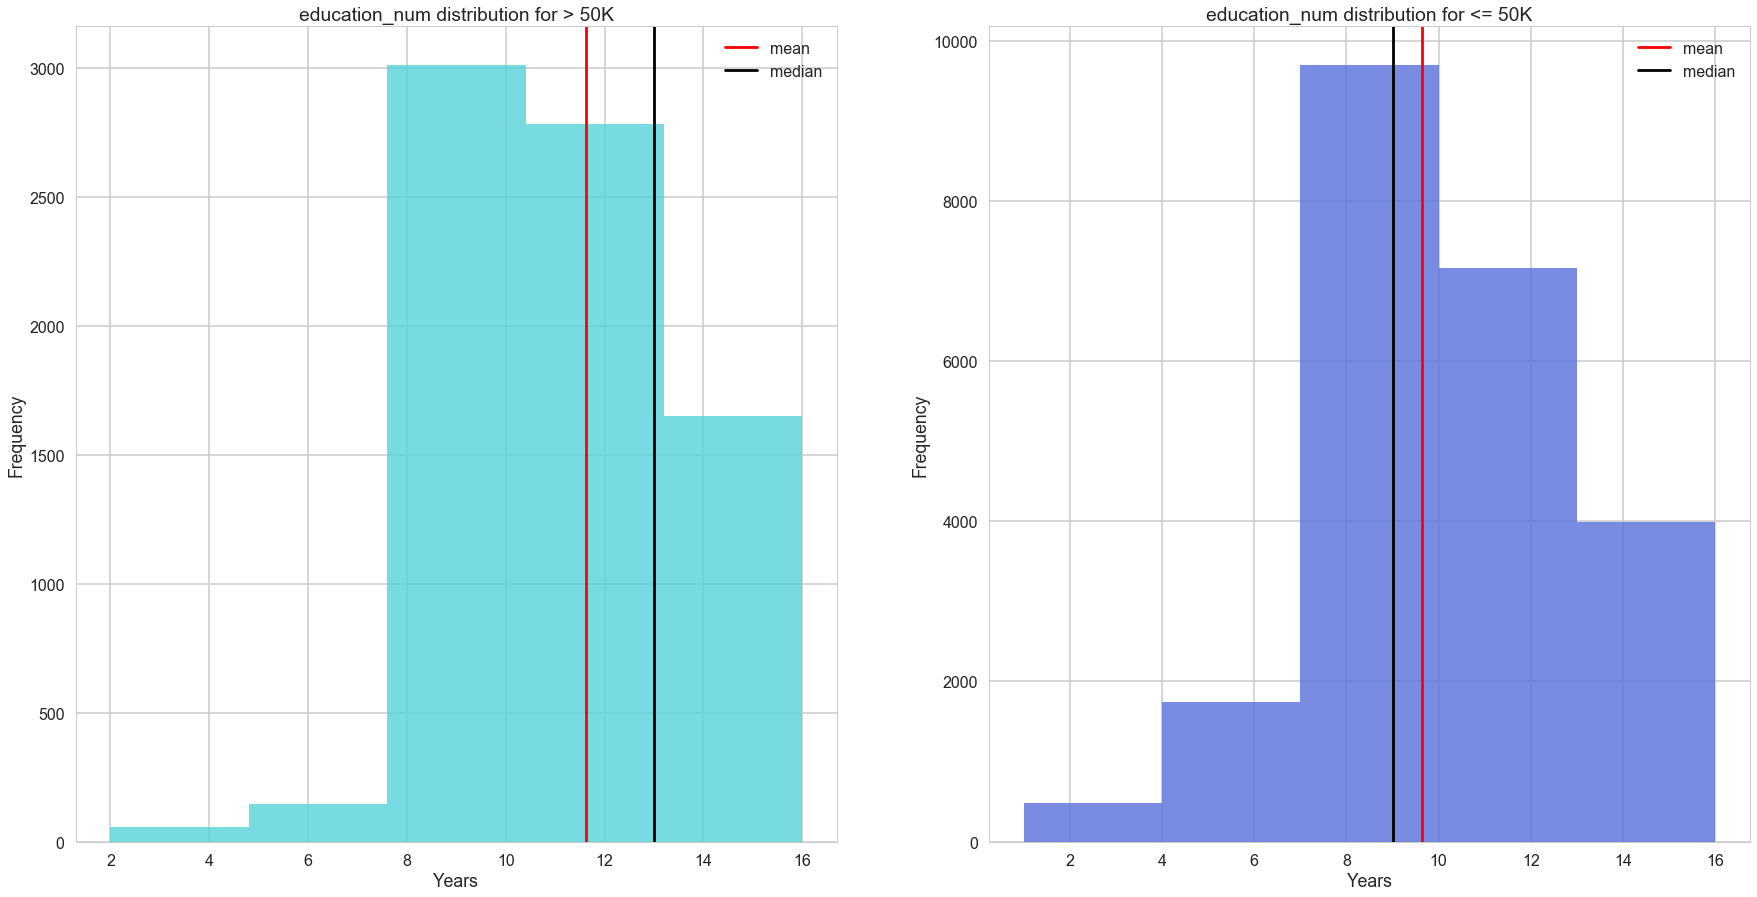

In [41]:
'''
The bar plot shows the count for <= 50K and > 50k for education_num.
'''

plt.figure(figsize = (30, 15))
colors = sns.color_palette("hls", 8)

#salary > 50K
plt.subplot(1, 2, 1)
plt.hist(census_data[census_data.salary == 1].education_num.values, bins = 5, facecolor = colors[4], alpha = 0.8)
plt.axvline(np.mean(census_data[census_data.salary == 1].education_num.values), 0, 1, color = 'red', label = 'mean')
plt.axvline(np.median(census_data[census_data.salary == 1].education_num.values), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')
plt.title('education_num distribution for > 50K')
plt.xlabel('Years')
plt.ylabel('Frequency')

#salary <= 50K
plt.subplot(1, 2, 2)
plt.hist(census_data[census_data.salary == 0].education_num.values, bins = 5, facecolor = colors[5], alpha = 0.8)
plt.axvline(np.mean(census_data[census_data.salary == 0].education_num.values), 0, 1, color = 'red', label = 'mean')
plt.axvline(np.median(census_data[census_data.salary == 0].education_num.values), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')
plt.title('education_num distribution for <= 50K')
plt.xlabel('Years')
plt.ylabel('Frequency')

We can see that people having around **8 to 13 years** of education **make more money** in the category **salary >50K**. However, for the **same education_num range**, the frequency of people making **<=50K is almost 3 times more**.

Populating the interactive namespace from numpy and matplotlib


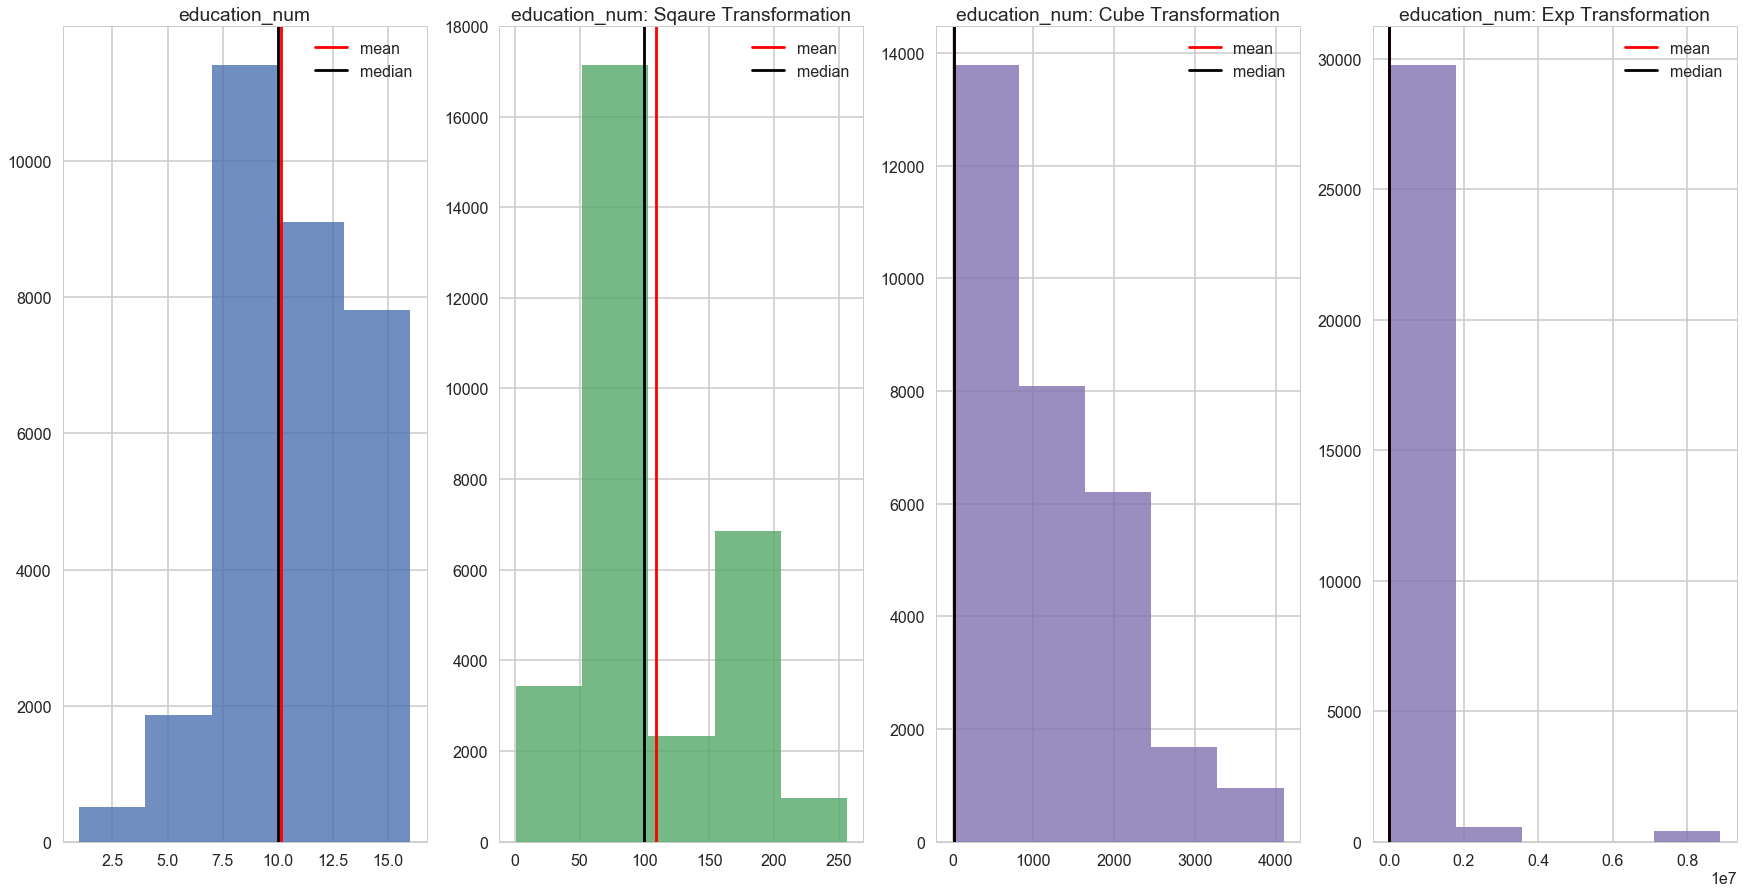

In [42]:
'''
Check the distribtion of education_num after applying a square-root and log transformations
'''

%pylab inline
plt.figure(figsize = (30, 15))
colors = sns.color_palette()

plt.subplot(1, 4, 1)
plt.title('education_num')
census_data.education_num.hist(bins = 5, color = colors[0], alpha = 0.8)
plt.axvline(census_data['education_num'].mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(census_data['education_num'].median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

plt.subplot(1, 4, 2)
plt.title('education_num: Sqaure Transformation')
square_transformed = census_data.education_num.apply(np.square)
square_transformed.hist(bins = 5, color = colors[1], alpha = 0.8)
plt.axvline(square_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(square_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

plt.subplot(1, 4, 3)
plt.title('education_num: Cube Transformation')
cube_transformed = (census_data.education_num ** 3)
cube_transformed.hist(bins = 5, color = colors[3], alpha = 0.8)
plt.axvline(log_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(log_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

plt.subplot(1, 4, 4)
plt.title('education_num: Exp Transformation')
exp_transformed = census_data.education_num.apply(np.exp)
exp_transformed.hist(bins = 5, color = colors[3], alpha = 0.8)
plt.axvline(log_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(log_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc= 'upper right')

Since the **cube transformation** right-skews the education_num feature, we can now check apply a square root transformation or a log transformation to further reduce the skewness. 

Populating the interactive namespace from numpy and matplotlib


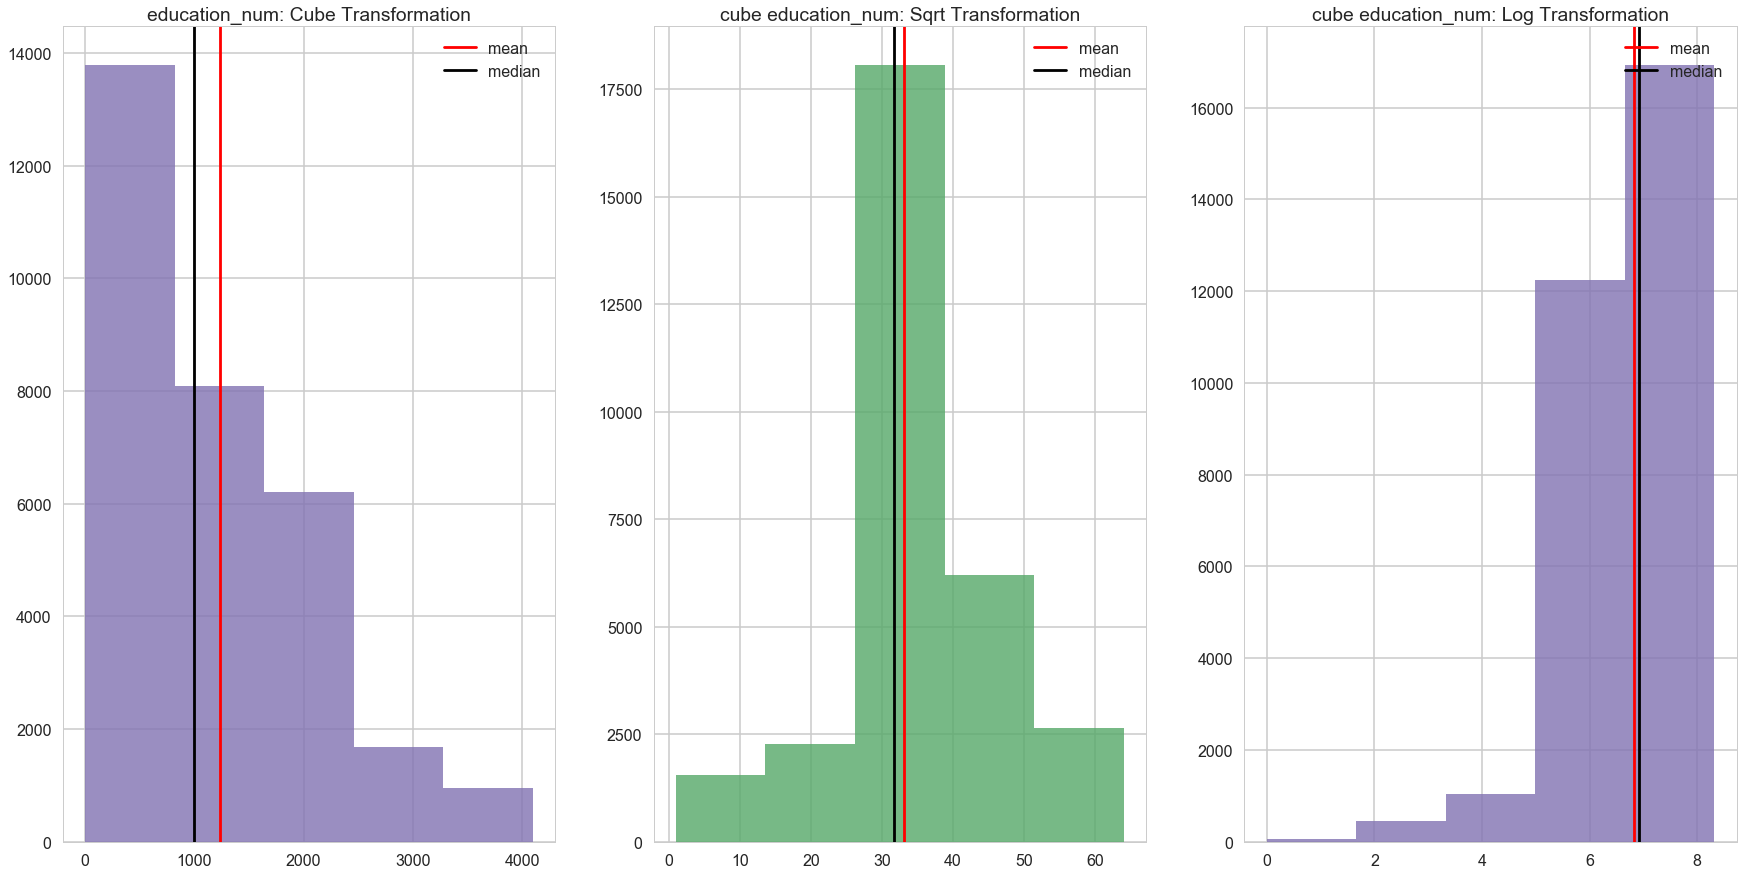

In [43]:
'''
Check the distribtion of cubed education_num after applying a square-root and log transformations
'''

%pylab inline
plt.figure(figsize=(30, 15))
colors = sns.color_palette()

plt.subplot(1, 3, 1)
plt.title('education_num: Cube Transformation')
cube_transformed = (census_data.education_num ** 3)
cube_transformed.hist(bins = 5, color = colors[3], alpha = 0.8)
plt.axvline(cube_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(cube_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

plt.subplot(1, 3, 2)
plt.title('cube education_num: Sqrt Transformation')
sqrt_transformed = cube_transformed.apply(np.sqrt)
sqrt_transformed.hist(bins = 5, color = colors[1], alpha = 0.8)
plt.axvline(sqrt_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(sqrt_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

plt.subplot(1, 3, 3)
plt.title('cube education_num: Log Transformation')
log_transformed = (cube_transformed).apply(np.log)
log_transformed.hist(bins = 5, color = colors[3], alpha = 0.8)
plt.axvline(log_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(log_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

A **square root transformation on top of the cube transformation** brings the education_num feature close to normal distribution.

In [44]:
'''
Add cubed sq-root transformed education_num as a new feature
'''

census_data['education_num_transformed'] = (census_data.education_num ** 3).apply(np.sqrt)

Furthermore, lets also check the distribution of the transfomed education_num w.r.t. the salary categories.

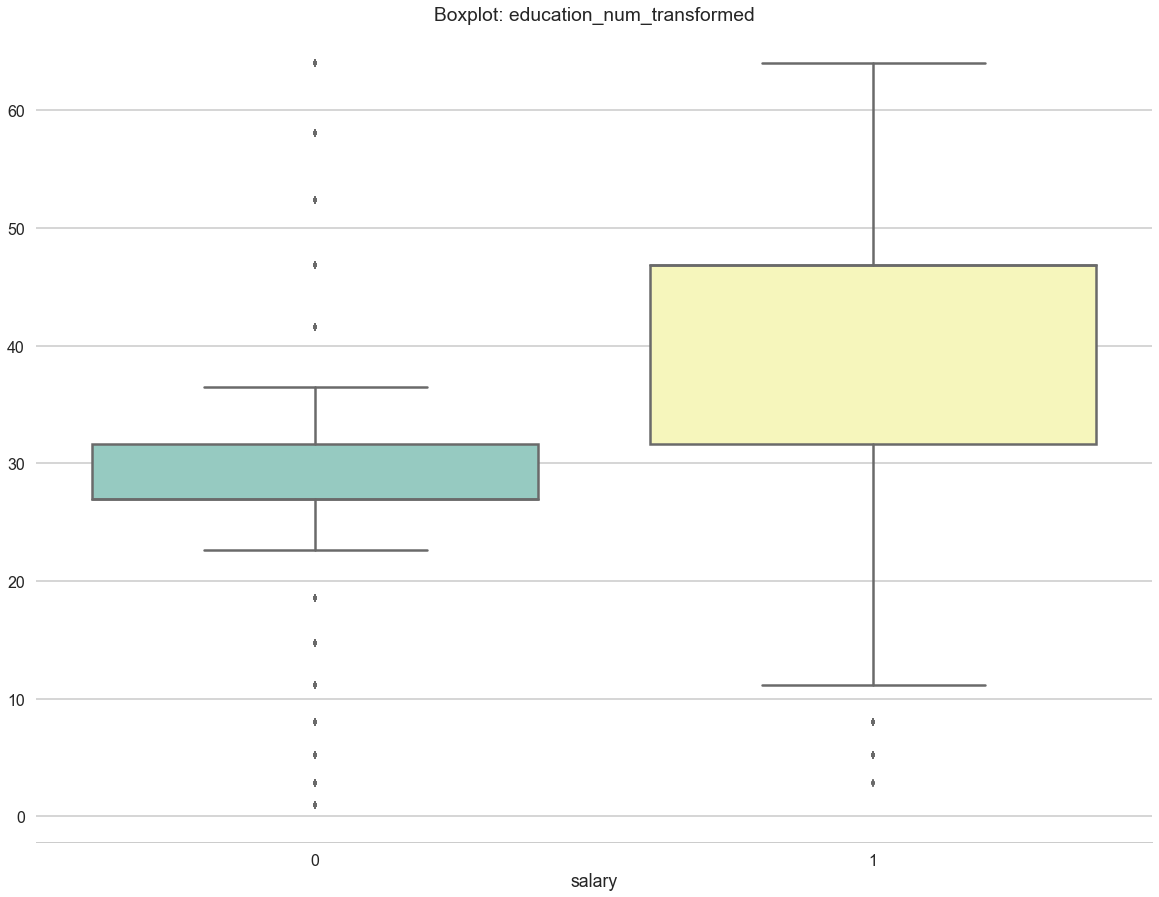

In [45]:
'''
Check distribution of education_num_transformed w.r.t. salary categories
'''

plt.figure(figsize=(20, 15))
sns.boxplot(x = "salary", y = "education_num_transformed", data = census_data, linewidth = 2.5, palette = "Set3")
plt.title('Boxplot: education_num_transformed')
ylabel('')
sns.despine(left = True)

At this point, **education_num_transformed** is ready for modeling. We can drop the original education_num feature. Furthermore, we can also **standardize** this feature since it now follows an approximate normal distribution.

In [46]:
census_data['education_num_transformed'] = (census_data['education_num_transformed'] - census_data['education_num_transformed'].mean())/census_data['education_num_transformed'].std()
del census_data['education_num']

### D. CAPITAL_GAIN

Populating the interactive namespace from numpy and matplotlib


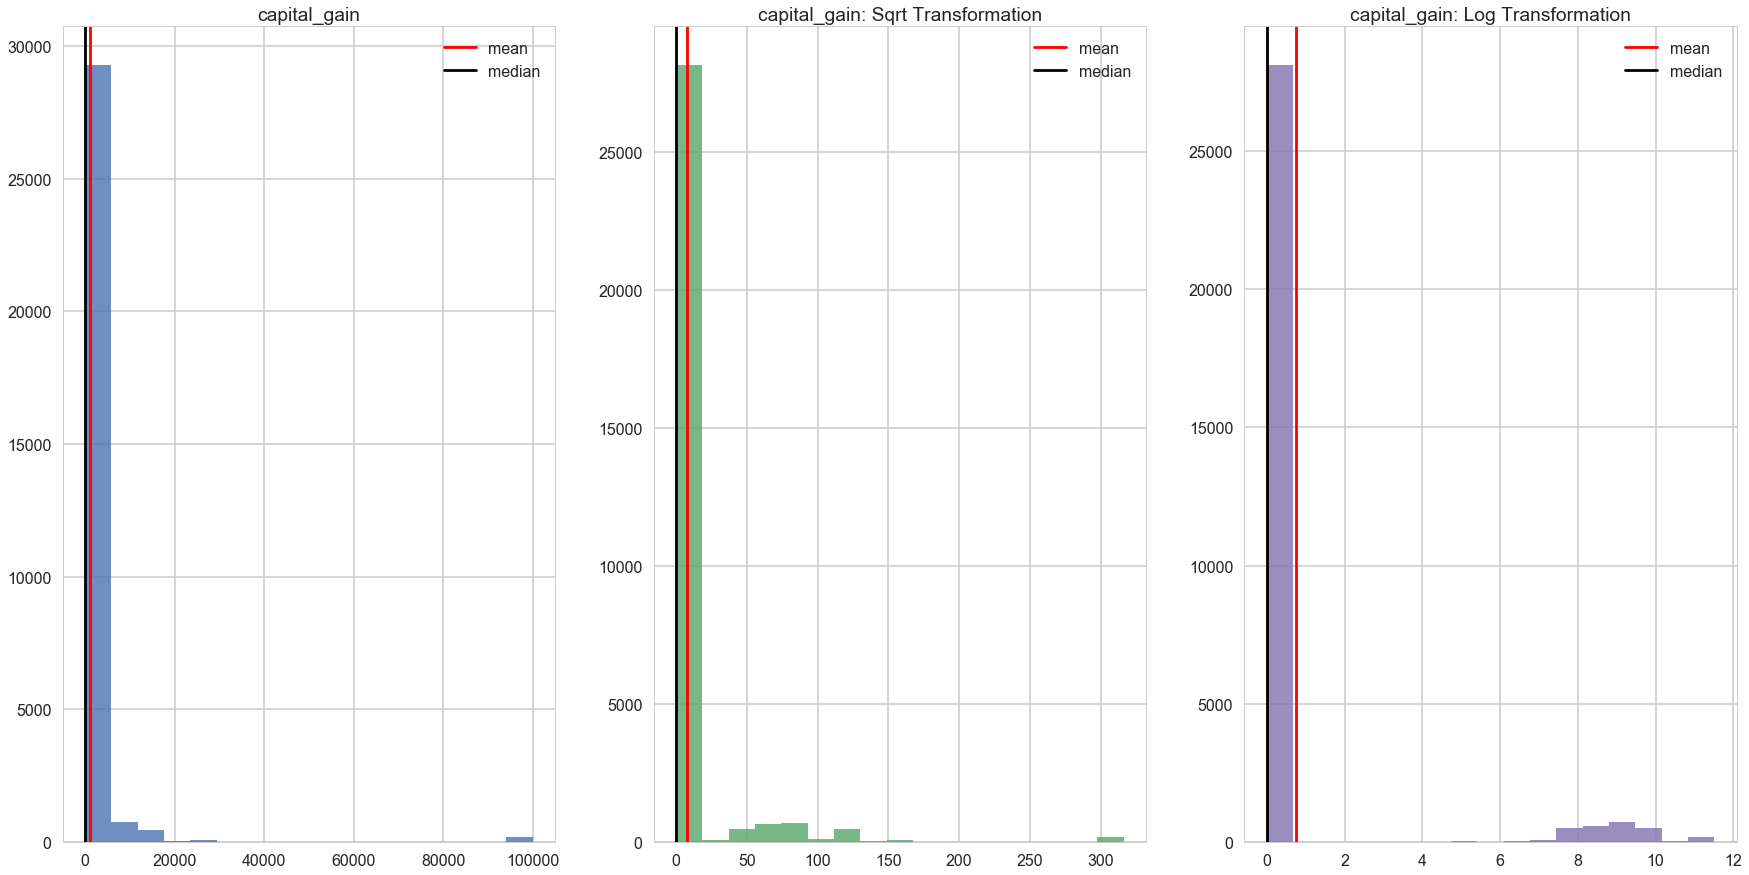

In [47]:
'''
Check the distribtion of capital_gain after applying a square-root and log transformation
'''

%pylab inline
plt.figure(figsize = (30, 15))
colors = sns.color_palette()

plt.subplot(1, 3, 1)
plt.title('capital_gain')
census_data.capital_gain.hist(bins = 17, color = colors[0], alpha = 0.8)
plt.axvline(census_data['capital_gain'].mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(census_data['capital_gain'].median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

plt.subplot(1, 3, 2)
plt.title('capital_gain: Sqrt Transformation')
sqrt_transformed = census_data.capital_gain.apply(np.sqrt)
sqrt_transformed.hist(bins = 17, color = colors[1], alpha = 0.8)
plt.axvline(sqrt_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(sqrt_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

plt.subplot(1, 3, 3)
plt.title('capital_gain: Log Transformation')
log_transformed = (census_data.capital_gain+1).apply(np.log)
log_transformed.hist(bins = 17, color = colors[3], alpha = 0.8)
plt.axvline(log_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(log_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

Since the transformations above have not helped to normalize the data, we can block the data into **3** separate **bins: Low (representing 0), Medium and High**. We can first **subset all the values that are  not = 0**  for capital_gain and then represent the **values lower than the median of the non-zero values as a Medium category and the rest as High**.

In [48]:
'''
Subset the non-zero observations to get the median
'''

census_data[census_data.capital_gain != 0]['capital_gain'].describe()

count     2589.000000
mean     13122.922750
std      22571.972006
min        114.000000
25%       3464.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital_gain, dtype: float64

In [49]:
'''
Create bins based on the above information and append the groups as a new feature
'''

bins = [-1, 113, 7297, 100000]
group_names = ['low', 'medium', 'high']

census_data['capital_gain_cat'] = pd.cut(census_data.capital_gain, 
                                         bins = bins, 
                                         labels = group_names)

In [50]:
'''
Check distributions of the bins
'''

print "Capital Gain Categories: "
print census_data.capital_gain_cat.value_counts()/len(census_data.capital_gain_cat) * 100

Capital Gain Categories: 
low       91.571717
high       4.433882
medium     3.994401
Name: capital_gain_cat, dtype: float64


Since **capital_gain** has an **extremely narrow distribution (> 90% of the data is clustered in low)**, we will **drop** this feature.

In [51]:
'''
Drop capital_gain related features
'''

del census_data['capital_gain']
del census_data['capital_gain_cat']

### E. CAPITAL_LOSS

Populating the interactive namespace from numpy and matplotlib


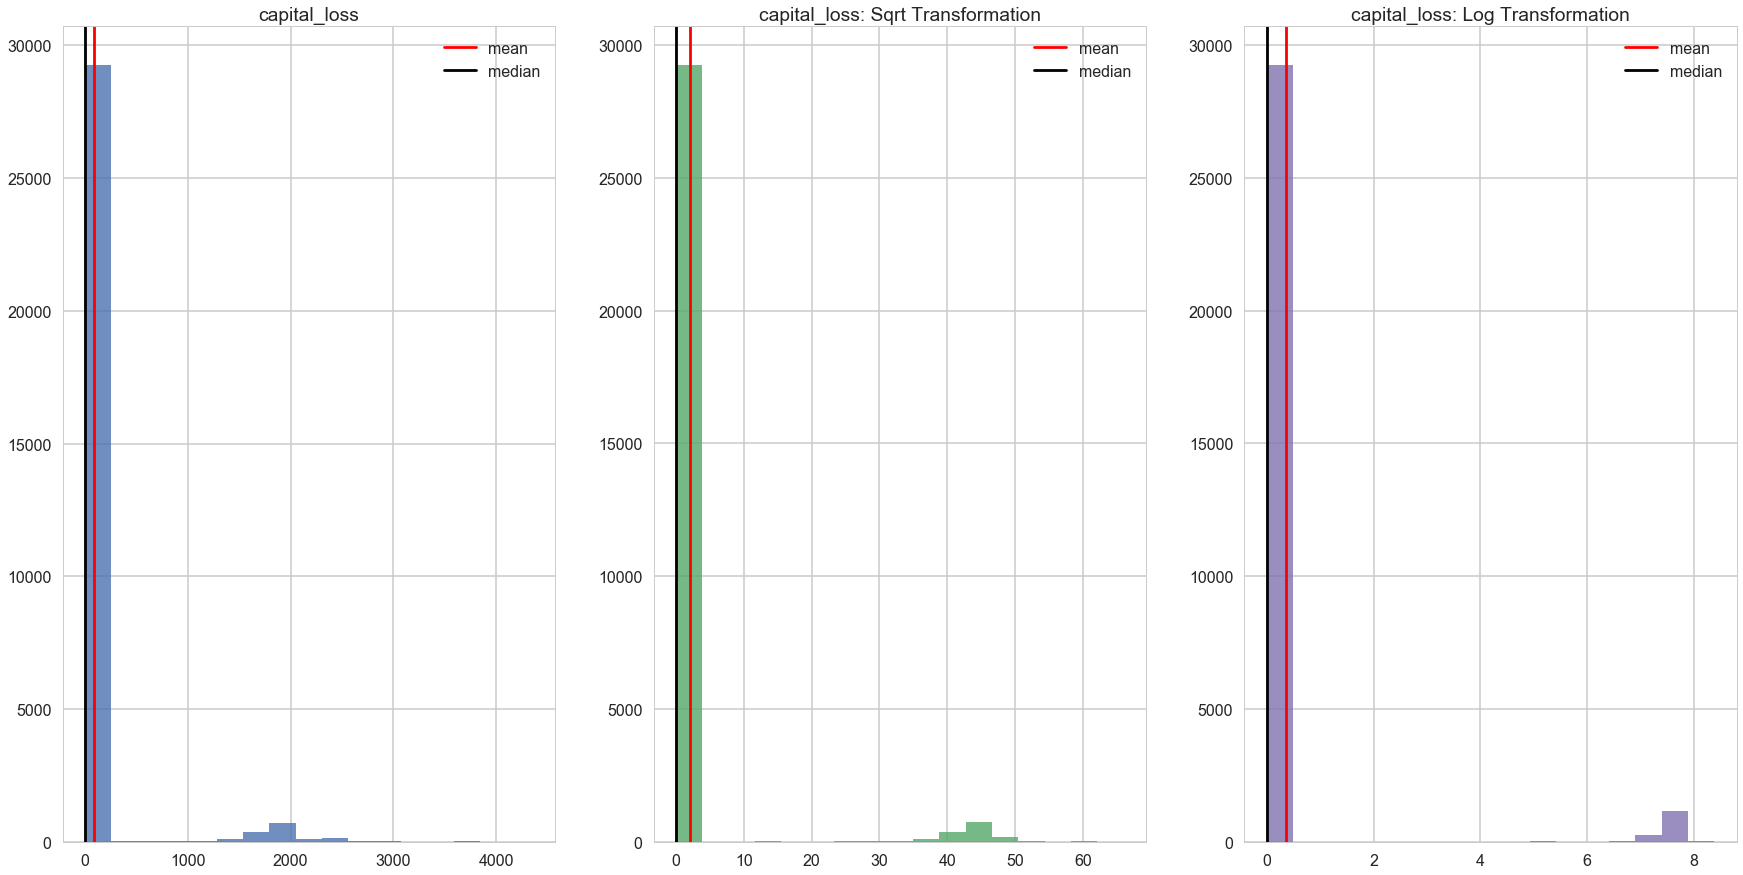

In [52]:
'''
Check the distribtion of capital_loss after applying a square-root and log transformation
'''

%pylab inline
plt.figure(figsize = (30, 15))
colors = sns.color_palette()

plt.subplot(1, 3, 1)
plt.title('capital_loss')
census_data.capital_loss.hist(bins = 17, color = colors[0], alpha = 0.8)
plt.axvline(census_data['capital_loss'].mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(census_data['capital_loss'].median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

plt.subplot(1, 3, 2)
plt.title('capital_loss: Sqrt Transformation')
sqrt_transformed = census_data.capital_loss.apply(np.sqrt)
sqrt_transformed.hist(bins = 17, color = colors[1], alpha = 0.8)
plt.axvline(sqrt_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(sqrt_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

plt.subplot(1, 3, 3)
plt.title('capital_loss: Log Transformation')
log_transformed = (census_data.capital_loss+1).apply(np.log)
log_transformed.hist(bins = 17, color = colors[3], alpha = 0.8)
plt.axvline(log_transformed.mean(), 0, 1, color = 'red', label = 'mean')
plt.axvline(log_transformed.median(), 0, 1, color = 'k', label = 'median')
plt.legend(frameon = False, loc = 'upper right')

Since the transformations above have not helped to standardize the data, we can block the data into **3** separate **bins: Low (representing 0), Medium and High**. We can first **subset all the values that are not = 0**  for capital_gain and then represent the **values lower than the median of the non-zero values as a Medium category and the rest as High**.

In [53]:
'''
Subset the non-zero observations to get the median
'''

census_data[census_data.capital_loss != 0]['capital_loss'].describe()

count    1461.000000
mean     1869.366188
std       362.675806
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: capital_loss, dtype: float64

In [54]:
'''
Create bins based on the above information and append the groups as a new feature
'''

bins = [-1, 154, 1886, 4357]
group_names = ['low','medium','high']

census_data['capital_loss_cat'] = pd.cut(census_data.capital_loss, 
                                         bins = bins, 
                                         labels = group_names)

In [55]:
'''
Check distributions of the bins
'''

print "Capital Loss Categories: "
print census_data.capital_loss_cat.value_counts()/len(census_data.capital_loss_cat) * 100

Capital Loss Categories: 
low       95.243831
high       2.828960
medium     1.927209
Name: capital_loss_cat, dtype: float64


Since **capital_loss** has an **extremely narrow distribution (> 90% of the data is clustered in low)**, we will **drop** this feature.

In [56]:
'''
Drop capital_loss related features
'''

del census_data['capital_loss']
del census_data['capital_loss_cat']

### F. EDUCATION

In [57]:
'''
Merge categories for education to 'school' & 'Assoc' based on mosaic plot output
'''

census_data['education_merged'] = census_data['education']

census_data.loc[census_data['education'] == '1st-4th', 'education_merged'] = 'School'
census_data.loc[census_data['education'] == '5th-6th', 'education_merged'] = 'School'
census_data.loc[census_data['education'] == '7th-8th', 'education_merged'] = 'School'
census_data.loc[census_data['education'] == '9th', 'education_merged'] = 'School'
census_data.loc[census_data['education'] == '10th', 'education_merged'] = 'School'
census_data.loc[census_data['education'] == '11th', 'education_merged'] = 'School'
census_data.loc[census_data['education'] == '12th', 'education_merged'] = 'School'

census_data.loc[census_data['education'] == 'Assoc-voc', 'education_merged'] = 'Assoc'
census_data.loc[census_data['education'] == 'Assoc-acdm', 'education_merged'] = 'Assoc'

del census_data['education'] #drop original

census_data.education_merged.value_counts()

HS-grad         9968
Some-college    6775
Bachelors       5182
School          3775
Assoc           2341
Masters         1675
Prof-school      558
Doctorate        398
Preschool         46
Name: education_merged, dtype: int64

### G. MARITAL_STATUS

In [58]:
'''
Merge categories for martial_status to 'Married' & 'NoSpouse' based on mosaic plot output
'''

census_data['martial_status_merged'] = census_data['martial_status']

census_data.loc[census_data['martial_status'] == 'Married-AF-spouse', 'martial_status_merged'] = 'Married'
census_data.loc[census_data['martial_status'] == 'Married-civ-spouse', 'martial_status_merged'] = 'Married'

census_data.loc[census_data['martial_status'] == 'Married-spouse-absent', 'martial_status_merged'] = 'NoSpouse'
census_data.loc[census_data['martial_status'] == 'Never-married', 'martial_status_merged'] = 'NoSpouse'
census_data.loc[census_data['martial_status'] == 'Separated', 'martial_status_merged'] = 'NoSpouse'
census_data.loc[census_data['martial_status'] == 'Widowed', 'martial_status_merged'] = 'NoSpouse'

del census_data['martial_status'] #drop original

census_data.martial_status_merged.value_counts()

Married     14360
NoSpouse    12100
Divorced     4258
Name: martial_status_merged, dtype: int64

### H. RELATIONSHIP

In [59]:
'''
Merge Husband and Wife categories for the relationship feature to 'Couple' based on mosaic plot output
'''

census_data['relationship_merged'] = census_data['relationship']

census_data.loc[census_data['relationship'] == 'Husband', 'relationship_merged'] = 'Couple'
census_data.loc[census_data['relationship'] == 'Wife', 'relationship_merged'] = 'Couple'

del census_data['relationship'] #drop original

census_data.relationship_merged.value_counts()

Couple            14139
Not-in-family      7865
Own-child          4525
Unmarried          3271
Other-relative      918
Name: relationship_merged, dtype: int64

## 5. DUMMY VARIABLE CREATION

In [60]:
'''
Print all column names
'''

census_data.columns.tolist()

['workclass',
 'occupation',
 'race',
 'sex',
 'hours_per_week',
 'salary',
 'age_transformed',
 'education_num_transformed',
 'education_merged',
 'martial_status_merged',
 'relationship_merged']

In [61]:
'''
Create dummies and view dummy columns
'''

training_data = pd.get_dummies(census_data)
training_data.columns.tolist()

['hours_per_week',
 'salary',
 'age_transformed',
 'education_num_transformed',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'sex_Female',
 'sex_Male',
 'education_merged_Assoc',
 'education_merged_Bachelors',
 'education_merged_Doctorate',
 'education_merged_HS-grad',
 'education_merged_Masters',
 'education_merged_Preschool',
 'education_merged_

In [62]:
'''
View dataset
'''

head = int(raw_input("To display first N rows, enter N: "))
training_data.head(head)

To display first N rows, enter N: 6


,hours_per_week,salary,age_transformed,education_num_transformed,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,education_merged_Assoc,education_merged_Bachelors,education_merged_Doctorate,education_merged_HS-grad,education_merged_Masters,education_merged_Preschool,education_merged_Prof-school,education_merged_School,education_merged_Some-college,martial_status_merged_Divorced,martial_status_merged_Married,martial_status_merged_NoSpouse,relationship_merged_Couple,relationship_merged_Not-in-family,relationship_merged_Other-relative,relationship_merged_Own-child,relationship_merged_Unmarried
0,40,0,0.211222,1.159924,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,13,0,0.923681,1.159924,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,40,0,0.136738,-0.506730,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,40,0,1.090766,-1.217916,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,40,0,-0.738939,1.159924,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,40,0,0.060267,1.622128,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0


## 6. PREPROCESSING TESTING DATA

In [63]:
'''
Import testing data
'''

data_test = pd.read_csv("./Data/adult.test",
                   sep = ",\s",
                   names = FEATURES,
                   na_values = NA_VALUES,
                   engine = 'python') 

print "Dimensions of the dataset (rows, columns): " , data_test.shape
print

head = int(raw_input("To display first N rows, enter N: "))
data_test.head(head)

Dimensions of the dataset (rows, columns):  (16282, 15)

To display first N rows, enter N: 6


,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [64]:
'''
Remove first row
'''

data_test = data_test.ix[1:]
#head = int(raw_input("To display first N rows, enter N: "))
#test.head(head)

In [65]:
'''
Check data types
'''

data_test.dtypes

age                object
workclass          object
fnlwgt            float64
education          object
education_num     float64
martial_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
salary             object
dtype: object

In [66]:
'''
Coerce age to numeric
'''

data_test.age = pd.to_numeric(data_test.age, errors = 'coerce')

In [67]:
'''
Check for NA values in categorical features
'''

data_test.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
martial_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
salary              0
dtype: int64

In [68]:
'''
Impute missing values
'''

data_test['workclass'].fillna('Private', inplace = True)
data_test['native_country'].fillna('United-States', inplace = True)

data_test = data_test.dropna(how = 'any')

print data_test.isnull().sum()

data_test = data_test.reset_index(drop = True)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64


In [69]:
'''
Encode salary variable as binary, <=50k -> 0 and >50k -> 1
'''

data_test.salary = data_test.salary.astype('category').cat.codes
data_test.salary.value_counts()

0    11543
1     3772
Name: salary, dtype: int64

In [70]:
'''
Add feature transformations
'''

#age
data_test['age_transformed'] = (data_test.age).apply(np.log)
data_test['age_transformed'] = (data_test['age_transformed'] - data_test['age_transformed'].mean())/data_test['age_transformed'].std()
del data_test['age'] #drop original


#education
data_test['education_merged'] = data_test['education']

data_test.loc[data_test['education'] == '1st-4th', 'education_merged'] = 'School'
data_test.loc[data_test['education'] == '5th-6th', 'education_merged'] = 'School'
data_test.loc[data_test['education'] == '7th-8th', 'education_merged'] = 'School'
data_test.loc[data_test['education'] == '9th', 'education_merged'] = 'School'
data_test.loc[data_test['education'] == '10th', 'education_merged'] = 'School'
data_test.loc[data_test['education'] == '11th', 'education_merged'] = 'School'
data_test.loc[data_test['education'] == '12th', 'education_merged'] = 'School'
data_test.loc[data_test['education'] == 'Assoc-voc', 'education_merged'] = 'Assoc'
data_test.loc[data_test['education'] == 'Assoc-acdm', 'education_merged'] = 'Assoc'
del data_test['education'] #drop original


#education_num
data_test['education_num_transformed'] = (data_test.education_num ** 3).apply(np.sqrt)
data_test['education_num_transformed'] = (data_test['education_num_transformed'] - data_test['education_num_transformed'].mean())/data_test['education_num_transformed'].std()
del data_test['education_num'] #drop original


#marital_status
data_test['martial_status_merged'] = data_test['martial_status']
data_test.loc[data_test['martial_status'] == 'Married-AF-spouse', 'martial_status_merged'] = 'Married'
data_test.loc[data_test['martial_status'] == 'Married-civ-spouse', 'martial_status_merged'] = 'Married'
data_test.loc[data_test['martial_status'] == 'Married-spouse-absent', 'martial_status_merged'] = 'NoSpouse'
data_test.loc[data_test['martial_status'] == 'Never-married', 'martial_status_merged'] = 'NoSpouse'
data_test.loc[data_test['martial_status'] == 'Separated', 'martial_status_merged'] = 'NoSpouse'
data_test.loc[data_test['martial_status'] == 'Widowed', 'martial_status_merged'] = 'NoSpouse'
del data_test['martial_status'] #drop original


#relationship
data_test['relationship_merged'] = data_test['relationship']
data_test.loc[data_test['relationship'] == 'Husband', 'relationship_merged'] = 'Couple'
data_test.loc[data_test['relationship'] == 'Wife', 'relationship_merged'] = 'Couple'
del data_test['relationship'] #drop original

In [71]:
'''
Drop columns, prepare data for modeling
'''

del data_test['fnlwgt']
del data_test['capital_gain']
del data_test['capital_loss']
del data_test['native_country']

In [72]:
'''
Print all column names
'''

data_test.columns.tolist()

['workclass',
 'occupation',
 'race',
 'sex',
 'hours_per_week',
 'salary',
 'age_transformed',
 'education_merged',
 'education_num_transformed',
 'martial_status_merged',
 'relationship_merged']

In [73]:
'''
Create dummies and view dummy columns
'''

testing_data = pd.get_dummies(data_test)
testing_data.columns.tolist()

['hours_per_week',
 'salary',
 'age_transformed',
 'education_num_transformed',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'sex_Female',
 'sex_Male',
 'education_merged_Assoc',
 'education_merged_Bachelors',
 'education_merged_Doctorate',
 'education_merged_HS-grad',
 'education_merged_Masters',
 'education_merged_Preschool',
 'education_merged_

In [74]:
'''
Check length of training & testing data features
'''

print "Is the length of training and testing feature same? ", len(training_data.columns.tolist()) == len(testing_data.columns.tolist())
print "Mismatch of how many features?", len(training_data.columns.tolist()) - len(testing_data.columns.tolist())
print "Are all the feature names matching in training & testing data? ", training_data.columns.tolist() == testing_data.columns.tolist()

Is the length of training and testing feature same?  True
Mismatch of how many features? 0
Are all the feature names matching in training & testing data?  True


In [75]:
'''
View test data
'''

head = int(raw_input("To display first N rows, enter N: "))
testing_data.head(head)

To display first N rows, enter N: 6


,hours_per_week,salary,age_transformed,education_num_transformed,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,education_merged_Assoc,education_merged_Bachelors,education_merged_Doctorate,education_merged_HS-grad,education_merged_Masters,education_merged_Preschool,education_merged_Prof-school,education_merged_School,education_merged_Some-college,martial_status_merged_Divorced,martial_status_merged_Married,martial_status_merged_NoSpouse,relationship_merged_Couple,relationship_merged_Not-in-family,relationship_merged_Other-relative,relationship_merged_Own-child,relationship_merged_Unmarried
0,40.0,0,-1.074663,-1.215571,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,50.0,0,0.113827,-0.504962,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
2,40.0,1,-0.752985,0.715950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,40.0,1,0.529954,-0.117570,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
4,30.0,0,-0.201882,-1.535969,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
5,32.0,1,1.548802,2.100803,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


## 7. DATA PREPARATION

In [76]:
'''
Store dependent variable for training and testing
'''

#shuffle data
training_data = training_data.iloc[np.random.permutation(len(training_data))].reset_index(drop = True)
testing_data = testing_data.iloc[np.random.permutation(len(testing_data))].reset_index(drop = True)

#create training and testing data
x_train = training_data.drop('salary', axis = 1)
y_train = training_data['salary']

x_test = testing_data.drop('salary', axis = 1)
y_test = testing_data['salary']

#check dimensions
print "training data shape: ", x_train.shape
print "training response shape: ", y_train.shape
print
print "testing data shape: ", x_test.shape
print "testing response shape: ", y_test.shape

training data shape:  (30718, 48)
training response shape:  (30718L,)

testing data shape:  (15315, 48)
testing response shape:  (15315L,)


## 8. MODEL TRAINING - RANDOM FOREST

In [77]:
'''
Train a random forest and check training & testing accuracy
'''

rf = RandomForestClassifier(n_estimators = 500, random_state = 0).fit(x_train, y_train)
training_accuracy = rf.score(x_train, y_train)
y_pred = rf.predict(x_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred)

print "The accuracy on the training set for random forest is %.2f" % (training_accuracy * 100),'%'
print "The accuracy on the testing set for the random forest model is : %.2f" % (testing_accuracy * 100),"%"

The accuracy on the training set for random forest is 96.34 %
The accuracy on the testing set for the random forest model is : 80.89 %


The **huge gap between the training and the testing error** shows that the classifier with the default parameters **overfits** the data. In order to increase the accuracy, we can perform **cross-validation** & **hyper-parameter tuning**. To do this, we can use **GridSearch** from sklearn. However, first we can check the **feature importance** score of each feature and select only the important features to remove the variables containing noise.

### A. Feature Importance

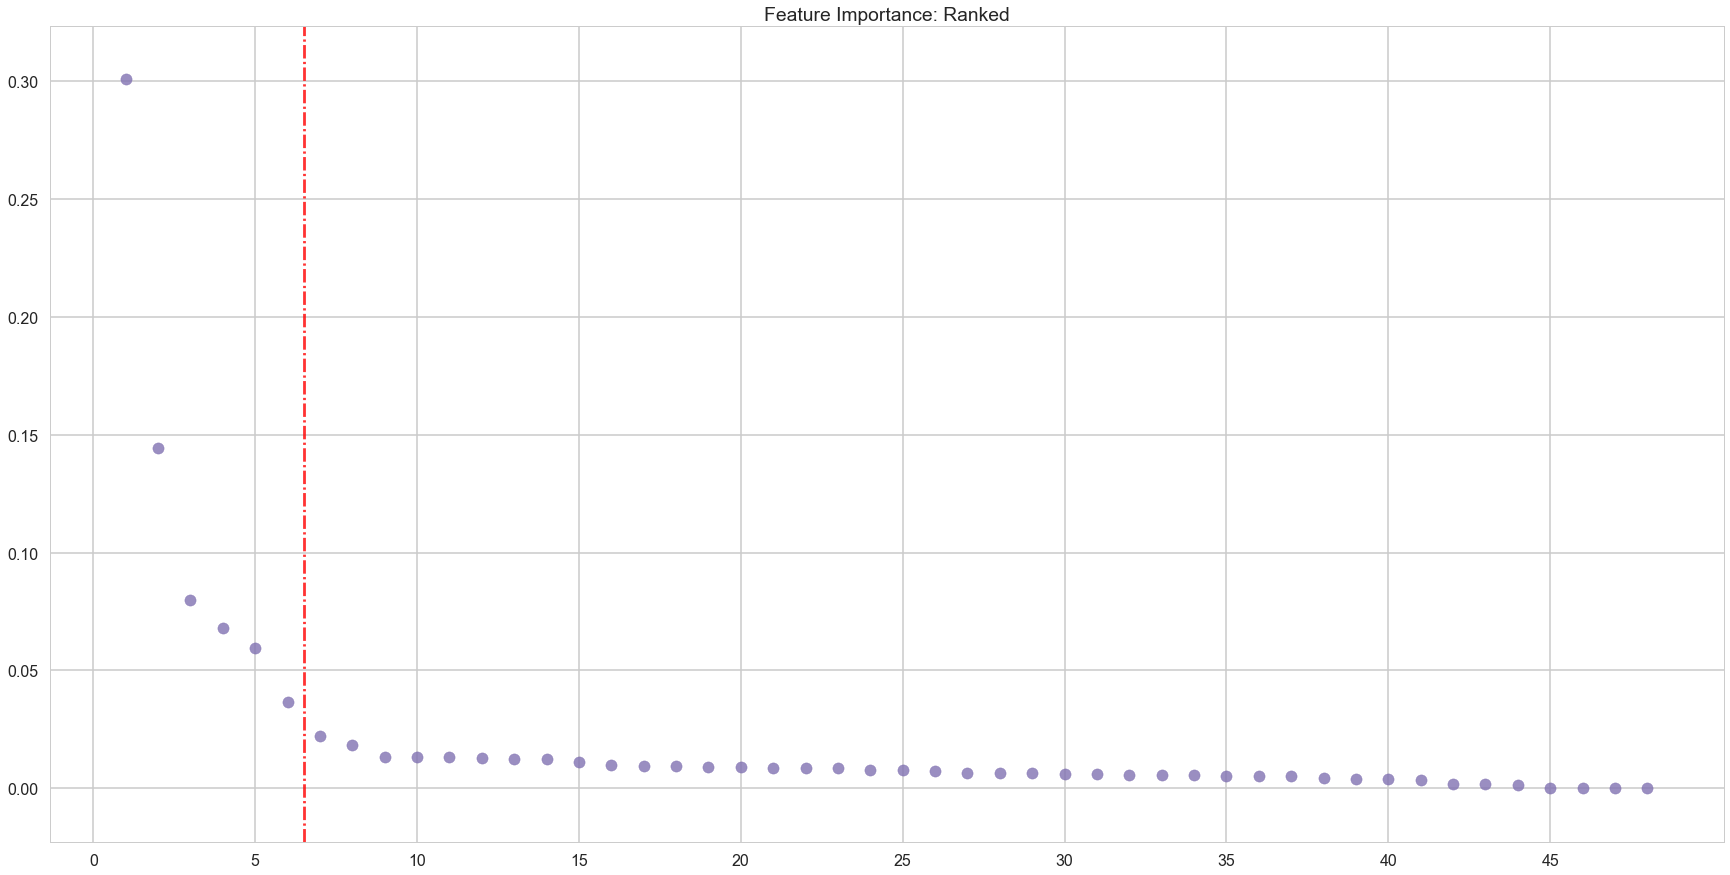

In [78]:
'''
Plot important features to decide optimal cut-off point to choose features
'''

importances = rf.feature_importances_
imp_ranked = np.sort(importances)[::-1]

plt.figure(figsize=(30, 15))
plt.scatter(range(1, len(imp_ranked) + 1), imp_ranked, alpha = 0.8, color = colors[3])
plt.title("Feature Importance: Ranked")
plt.xticks(np.arange(0, len(imp_ranked) + 1, 5))
plt.axvline(6.5, color = 'red', alpha = 0.8, linestyle = '-.')
plt.show()

From the above plot, we can conclude that only the **top 6 important features** have a reasonable predictive power and the rest of the features have an importance close to 0. We can now model only with the top 6 features and check the accuracy. The top 6 feautues have >= 0.03 importance score.

In [79]:
'''
Get important features column index (top 6)
'''
important_feature_index = [i for i, x in enumerate(importances) if x >= 0.03]
print "features selected: ", len(important_feature_index)
print
print "feature index: ", important_feature_index
print

important_features_to_model = x_train.iloc[:, important_feature_index]
names = important_features_to_model.columns.tolist()
print "column names: ", names

features selected:  6

feature index:  [0, 1, 2, 41, 42, 43]

column names:  ['hours_per_week', 'age_transformed', 'education_num_transformed', 'martial_status_merged_Married', 'martial_status_merged_NoSpouse', 'relationship_merged_Couple']


Populating the interactive namespace from numpy and matplotlib


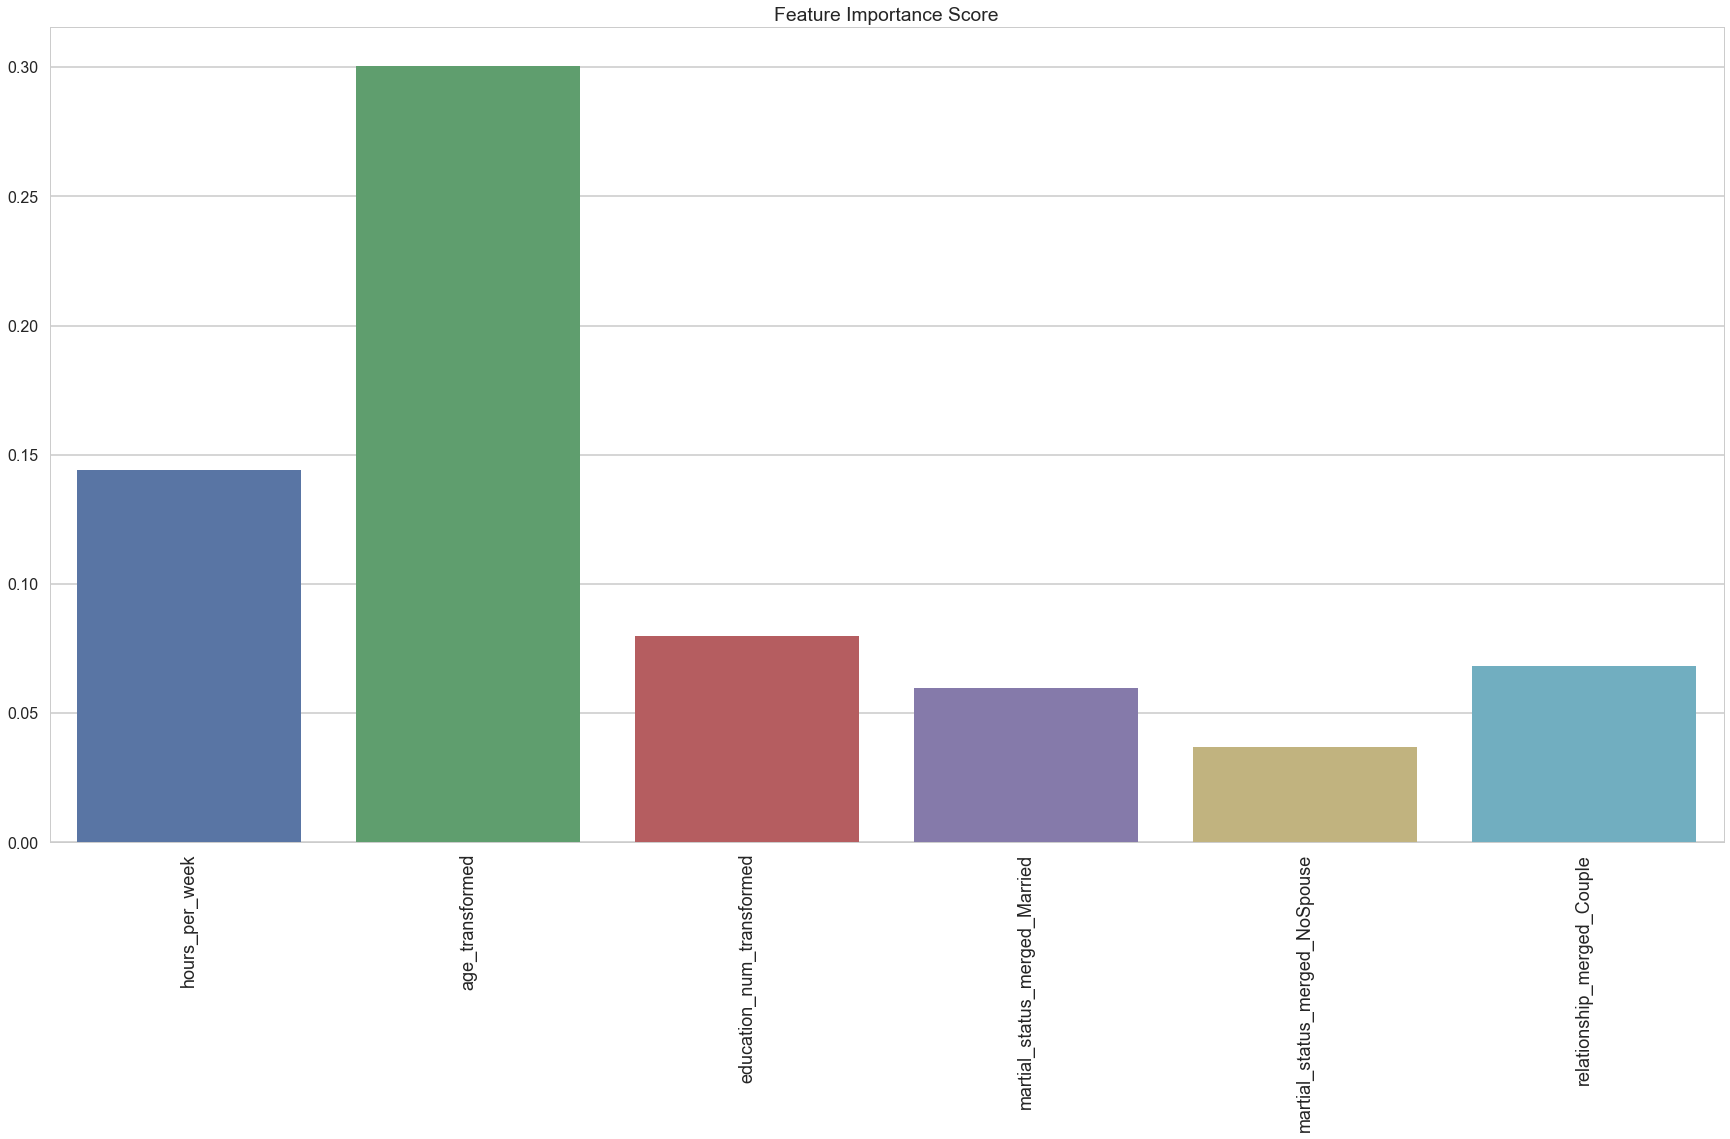

In [80]:
'''
Variable importance plot
'''

%pylab inline 
plt.figure(figsize = (30, 15))

lists = importances[important_feature_index]
plt.title("Feature Importance Score")
sns.barplot(range(0, len(names)), lists)
plt.xticks(range(0, len(names)), names[0: len(names)], rotation = 90, size = 18)
plt.show()

### B. Parameter Tuning

In [81]:
'''
Select only important features
'''

#create training and testing data
x_train = x_train[names]
x_test = x_test[names]

#check dimensions
print "training data shape: ", x_train.shape
print "training response shape: ", y_train.shape
print
print "testing data shape: ", x_test.shape
print "testing response shape: ", y_test.shape

training data shape:  (30718, 6)
training response shape:  (30718L,)

testing data shape:  (15315, 6)
testing response shape:  (15315L,)


In [82]:
'''
Tune the model
'''

#set tuning parameters
PARAMS_SPACE = { 'n_estimators': [500],
                 'n_jobs': [-1],
                 'max_depth': range(1,16),   
                 'min_samples_split': range(2, 11) + [100, 500, 1000],
                }

CV_FOLDS = 5

#perform cv and tuning
tune_rf = GridSearchCV(rf, param_grid = PARAMS_SPACE, cv = CV_FOLDS).fit(x_train, y_train)
print "BEST estimator based on score = 'accuracy': ", "\n", tune_rf.best_estimator_

BEST estimator based on score = 'accuracy':  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)


In [85]:
'''
Check accuracy after tuning
'''

tuned_rf = RandomForestClassifier(max_depth=11, min_samples_split=100, n_estimators=500).fit(x_train, y_train)
training_accuracy_new = tuned_rf.score(x_train, y_train)
y_pred_new = tuned_rf.predict(x_test)
testing_accuracy_new = metrics.accuracy_score(y_test, y_pred_new)

print "The accuracy on the training set for random forest is %.2f" % (training_accuracy_new * 100), '%'
print "The accuracy on the testing set for the random forest model is : %.2f" % (testing_accuracy_new * 100), "%"

The accuracy on the training set for random forest is 83.14 %
The accuracy on the testing set for the random forest model is : 82.58 %


There is an **improvement** in the model accuracy by **1.69%**. Furthermore, the training and the testing accuracy are reasonably close, which is an indication that the model has not overfit. 

At this point, I choose to conclude my analysis.

Populating the interactive namespace from numpy and matplotlib
Confusion matrix: 
       <=50K  >50K
<=50K  10626   917
>50K    1751  2021



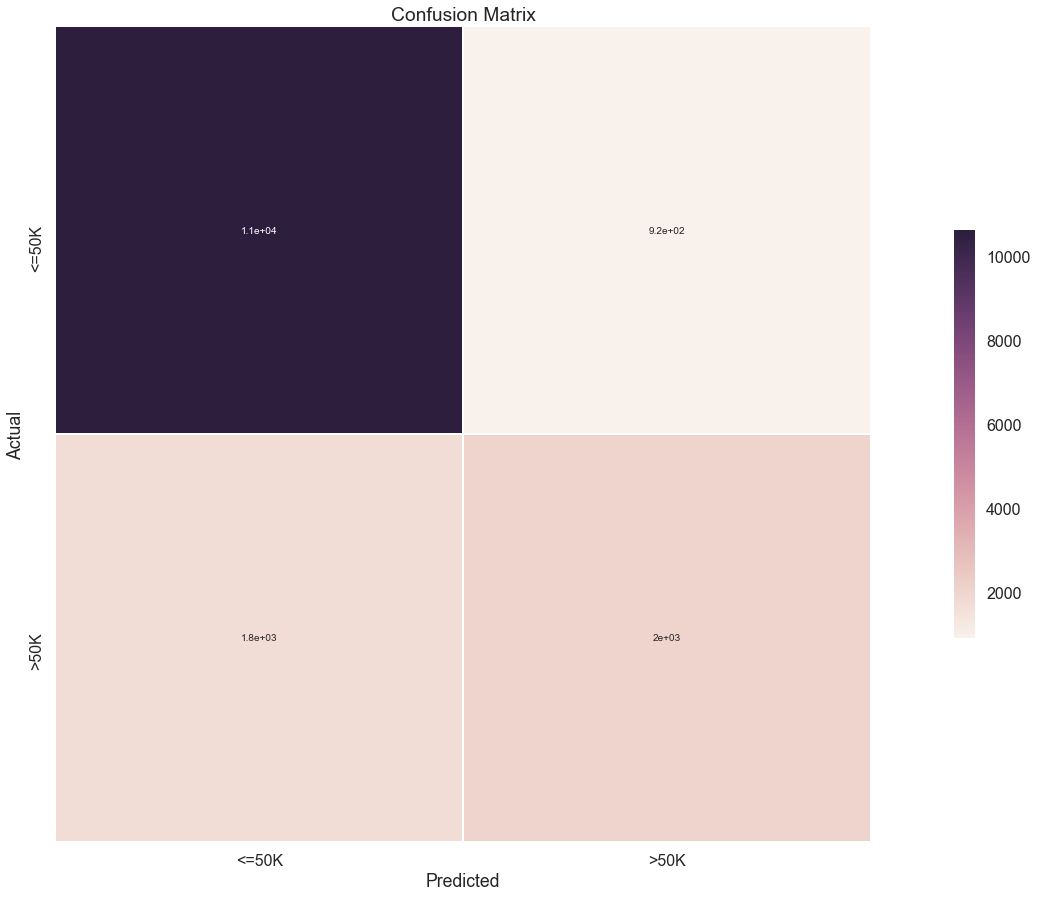

In [111]:
'''
Confusion Matrix
'''

%pylab inline 
plt.figure(figsize = (30, 15))

confusion_matrix = pd.crosstab(y_test, y_pred_new)
confusion_matrix.index = ['<=50K', '>50K']
confusion_matrix.columns = ['<=50K', '>50K']

print "Confusion matrix: "
print confusion_matrix
print 

sns.heatmap(confusion_matrix,
            square = True, 
            linewidths = 0.5,  
            cbar_kws = {"shrink": .5},
            annot = True)

plt.title('Confusion Matrix')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [116]:
'''
Classification report
'''

print metrics.classification_report(y_test, y_pred_new)

             precision    recall  f1-score   support

          0       0.86      0.92      0.89     11543
          1       0.69      0.54      0.60      3772

avg / total       0.82      0.83      0.82     15315



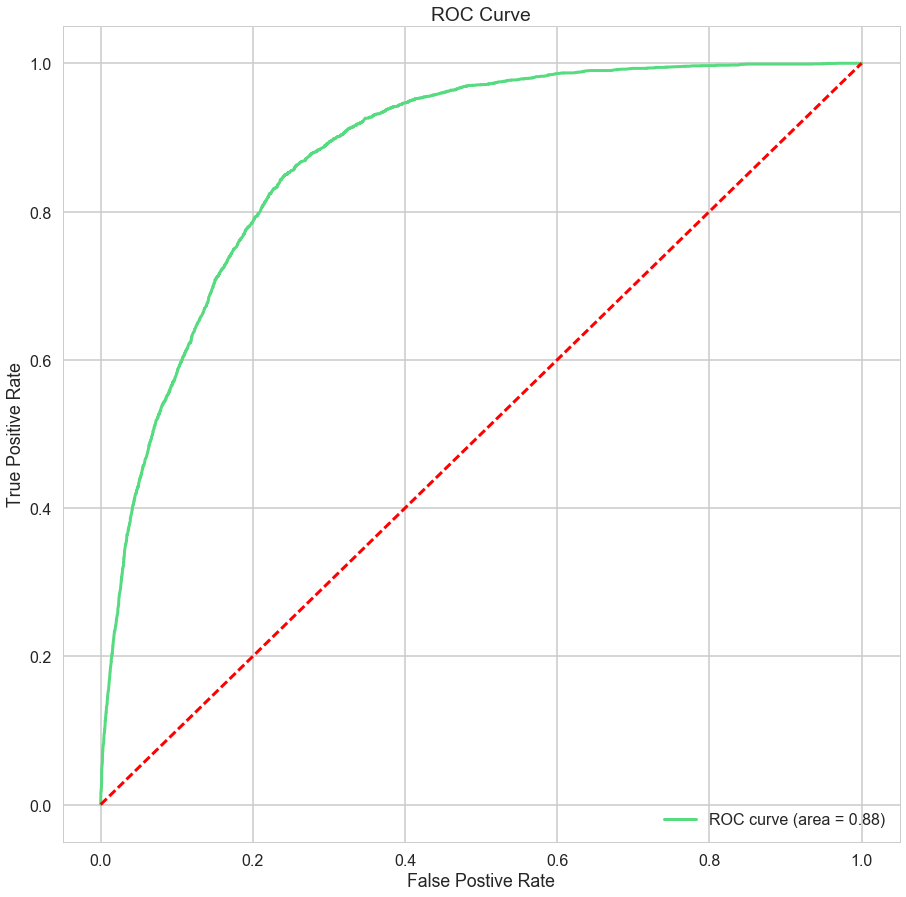

In [134]:
'''
ROC curve
'''

plt.figure(figsize = (15, 15))

preds = tuned_rf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color = colors1[3], lw = 3, label ='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'red', lw = 3, linestyle='--')
plt.legend(loc = "lower right")
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Postive Rate')

Receiving Operating Characteristic, or ROC, is a visual way for inspecting the performance of a binary classifier (0/1). In particular, it's comparing the rate at which the classifier is making correct predictions (True Positives or TP) and the rate at which the classifier is making false alarms (False Positives or FP).

The ROC curve helps decide the optimal cut-off point (threshold probability) to be chosen in order to classify the class as 0 or 1. This curve is also useful for comparing different model performances.

## 9. CONCLUSION

* Only **6 features**: **hours_per_week, age, education_num, martial_status_merged_Married, martial_status_merged_NoSpouse, relationship_merged_Couple** were useful for building the predictive model. 
* The model has a **high recall for <=50K (92%)** but a **low recall for >50K (54%)**. This means the model is correctly able to recollect more cases for salary is <=50K than salary >50K. Within this recall, the respective precision is 86% and 68%. The **precision** is the **percentage of the correct recalls** from all the recalls made for each category.

## 10. POSSIBLE IMPROVEMENTS

1. Feature selection and importance testing using statistical techniques (such as chi-sq or correlation based feature selection).
2. Fitting different classification models (SVM, Decision Tree, KNN, etc.) and comparing accuracy.
3. Examining more feature interactions (such as education vs. education_num) to eliminate un-wanted variables.
4. Ensemble modeling & handling of class imbalance (over-sampling or under-sampling).
5. Hyper-parameter tuning based on different score criterions.


                                                                       - Riddhik Rathod (@DataAstrologer)